# **Loading Data**

In [293]:
import json
#loading our dataset into 'data'
with open('/kaggle/input/transactions/transactions.txt') as f:
    data = [json.loads(line) for line in f]
    
#Converting our data to a pandas df called 'transactions'
import pandas as pd
transactions = pd.DataFrame(data)

In [294]:
#looking at the first few rows of the dataset
transactions.head()

accountNumber customerId  creditLimit  availableMoney  transactionDateTime  \
0     737265056  737265056       5000.0          5000.0  2016-08-13T14:27:32   
1     737265056  737265056       5000.0          5000.0  2016-10-11T05:05:54   
2     737265056  737265056       5000.0          5000.0  2016-11-08T09:18:39   
3     737265056  737265056       5000.0          5000.0  2016-12-10T02:14:50   
4     830329091  830329091       5000.0          5000.0  2016-03-24T21:04:46   

   transactionAmount         merchantName acqCountry merchantCountryCode  \
0              98.55                 Uber         US                  US   
1              74.51          AMC #191138         US                  US   
2               7.47           Play Store         US                  US   
3               7.47           Play Store         US                  US   
4              71.18  Tim Hortons #947751         US                  US   

  posEntryMode posConditionCode merchantCategoryCode currentExpDate  \
0           02               01            rideshare        06/2023   
1           09               01        entertainment        02/2024   
2           09               01           mobileapps        08/2025   
3           09               01           mobileapps        08/2025   
4           02               01             fastfood        10/2029   

  accountOpenDate dateOfLastAddressChange cardCVV enteredCVV cardLast4Digits  \
0      2015-03-14              2015-03-14     414        414            1803   
1      2015-03-14              2015-03-14     486        486             767   
2      2015-03-14              2015-03-14     486        486             767   
3      2015-03-14              2015-03-14     486        486             767   
4      2015-08-06              2015-08-06     885        885            3143   

  transactionType echoBuffer  currentBalance merchantCity merchantState  \
0        PURCHASE                        0.0                              
1        PURCHASE                        0.0                              
2        PURCHASE                        0.0                              
3        PURCHASE                        0.0                              
4        PURCHASE                        0.0                              

  merchantZip  cardPresent posOnPremises recurringAuthInd  \
0                    False                                  
1                     True                                  
2                    False                                  
3                    False                                  
4                     True                                  

   expirationDateKeyInMatch  isFraud  
0                     False    False  
1                     False    False  
2                     False    False  
3                     False    False  
4                     False    False

In [295]:
#change our transactionDateTime to a better and more understandable format
transactions['transactionDateTime'] = pd.to_datetime(transactions['transactionDateTime'])

In [296]:
#since .head() wont print out all the columns we need to change the display parameter
pd.options.display.max_columns = None

In [297]:
#We can now see all the columns in our dataset
transactions.head()

accountNumber customerId  creditLimit  availableMoney transactionDateTime  \
0     737265056  737265056       5000.0          5000.0 2016-08-13 14:27:32   
1     737265056  737265056       5000.0          5000.0 2016-10-11 05:05:54   
2     737265056  737265056       5000.0          5000.0 2016-11-08 09:18:39   
3     737265056  737265056       5000.0          5000.0 2016-12-10 02:14:50   
4     830329091  830329091       5000.0          5000.0 2016-03-24 21:04:46   

   transactionAmount         merchantName acqCountry merchantCountryCode  \
0              98.55                 Uber         US                  US   
1              74.51          AMC #191138         US                  US   
2               7.47           Play Store         US                  US   
3               7.47           Play Store         US                  US   
4              71.18  Tim Hortons #947751         US                  US   

  posEntryMode posConditionCode merchantCategoryCode currentExpDate  \
0           02               01            rideshare        06/2023   
1           09               01        entertainment        02/2024   
2           09               01           mobileapps        08/2025   
3           09               01           mobileapps        08/2025   
4           02               01             fastfood        10/2029   

  accountOpenDate dateOfLastAddressChange cardCVV enteredCVV cardLast4Digits  \
0      2015-03-14              2015-03-14     414        414            1803   
1      2015-03-14              2015-03-14     486        486             767   
2      2015-03-14              2015-03-14     486        486             767   
3      2015-03-14              2015-03-14     486        486             767   
4      2015-08-06              2015-08-06     885        885            3143   

  transactionType echoBuffer  currentBalance merchantCity merchantState  \
0        PURCHASE                        0.0                              
1        PURCHASE                        0.0                              
2        PURCHASE                        0.0                              
3        PURCHASE                        0.0                              
4        PURCHASE                        0.0                              

  merchantZip  cardPresent posOnPremises recurringAuthInd  \
0                    False                                  
1                     True                                  
2                    False                                  
3                    False                                  
4                     True                                  

   expirationDateKeyInMatch  isFraud  
0                     False    False  
1                     False    False  
2                     False    False  
3                     False    False  
4                     False    False

In [298]:
#We can check the structure of our dataframe using
print(f"In our Dataset the number of rows is {transactions.shape[0]} and the number of columns is {transactions.shape[1]}" )

In our Dataset the number of rows is 786363 and the number of columns is 29


# **Data Cleaning**

In [299]:
#We can see our column names, number of non null rows and aso the data type of each of the columns
#White spaces like '' will not be considered as na values here so we need to do further analysis to pick that up
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             786363 non-null  object        
 1   customerId                786363 non-null  object        
 2   creditLimit               786363 non-null  float64       
 3   availableMoney            786363 non-null  float64       
 4   transactionDateTime       786363 non-null  datetime64[ns]
 5   transactionAmount         786363 non-null  float64       
 6   merchantName              786363 non-null  object        
 7   acqCountry                786363 non-null  object        
 8   merchantCountryCode       786363 non-null  object        
 9   posEntryMode              786363 non-null  object        
 10  posConditionCode          786363 non-null  object        
 11  merchantCategoryCode      786363 non-null  object        
 12  cu

In [300]:
#Since these columns obviously are numeric we can convert them from their object dtype to numeric - float
numeric_columns = ['accountNumber','customerId', 'posEntryMode', 'posConditionCode',
                   'cardCVV', 'enteredCVV', 'cardLast4Digits']

transactions[numeric_columns] = transactions[numeric_columns].apply(pd.to_numeric)

In [301]:
#helps with model building later on
bool_columns = ['cardPresent','expirationDateKeyInMatch','isFraud']
transactions[bool_columns] = transactions[bool_columns].astype(int)

In [302]:
#We can cross check if we have successfully done the above conversions
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             786363 non-null  int64         
 1   customerId                786363 non-null  int64         
 2   creditLimit               786363 non-null  float64       
 3   availableMoney            786363 non-null  float64       
 4   transactionDateTime       786363 non-null  datetime64[ns]
 5   transactionAmount         786363 non-null  float64       
 6   merchantName              786363 non-null  object        
 7   acqCountry                786363 non-null  object        
 8   merchantCountryCode       786363 non-null  object        
 9   posEntryMode              782309 non-null  float64       
 10  posConditionCode          785954 non-null  float64       
 11  merchantCategoryCode      786363 non-null  object        
 12  cu

In [303]:
#we use the .replace fuction to find more than just single blank spaces and fill them with NA values
transactions.replace(r'^\s*$', pd.NA, regex=True, inplace=True)

#We count the number of missing values in each column
missing_count = transactions.isnull().sum()

#We then save all columns and the count where we have missing values
missing_columns = missing_count[missing_count > 0]

#Printing out the columns so that we can deal with them
print("These are the columns which have missing values\n",missing_columns)

These are the columns which have missing values
 acqCountry               4562
merchantCountryCode       724
posEntryMode             4054
posConditionCode          409
transactionType           698
echoBuffer             786363
merchantCity           786363
merchantState          786363
merchantZip            786363
posOnPremises          786363
recurringAuthInd       786363
dtype: int64


In [304]:
drop_columns = ['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd']
transactions = transactions.drop(columns=drop_columns)

In [305]:
#trying to find the perecentage of non NA values where acqCountry and merchantCountryCode are the same
valid_transactions = transactions.dropna(subset=['acqCountry', 'merchantCountryCode'])
different_values = valid_transactions[valid_transactions['acqCountry'] != valid_transactions['merchantCountryCode']]
different_count = len(different_values)
total_count = len(valid_transactions)
different_percentage = (different_count / total_count) * 100
same_percentage = 100 - different_percentage

print(same_percentage)
#We can see that 99.99% of the times the 2 columns hae the same values

99.99143001133285


In [306]:
#we find every row where merchantCountryCode is NA and acqCountry is not NA then we fill the NA value with the respective acqCountry value, viceversa.
transactions.loc[transactions['acqCountry'].isnull() & transactions['merchantCountryCode'].notnull(), 'acqCountry'] = transactions['merchantCountryCode']
transactions.loc[transactions['merchantCountryCode'].isnull() & transactions['acqCountry'].notnull(), 'merchantCountryCode'] = transactions['acqCountry']

#We find the mode to fill the other NA values
acq_mode = transactions['acqCountry'].mode()[0]
merchant_mode = transactions['merchantCountryCode'].mode()[0]
transactions['acqCountry'] = transactions['acqCountry'].fillna(acq_mode)
transactions['merchantCountryCode'] = transactions['merchantCountryCode'].fillna(merchant_mode)

In [307]:
#trying to find the perecentage of non NA values where transactionType is 'ADDRESS_VERIFICATION' when 'transactionAmount' is 0
valid_transactions = valid_transactions.dropna(subset=['transactionType'])
address_verification_count = len(valid_transactions[(valid_transactions['transactionAmount'] == 0) & (valid_transactions['transactionType'] == 'ADDRESS_VERIFICATION')])
total_count = len(valid_transactions[valid_transactions['transactionAmount'] == 0])
address_verification_percentage = (address_verification_count / total_count) * 100 if total_count > 0 else 0

print(address_verification_percentage)
#We can see that 90.8% of the row where transactionAmount is 0 had 'ADDRESS_VERIFICATION' in transactionType 

90.84446456871179


In [308]:
#We find where the transactionType is NA and the transactionAmount is equal to 0, then we fill that row transactionType with 'ADDRESS_VERIFICATION'
transactions.loc[transactions['transactionType'].isnull() & (transactions['transactionAmount'] == 0), 'transactionType'] = 'ADDRESS_VERIFICATION'

#We find the mode for the columns and fill the other NA values with it
transaction_type_mode = transactions['transactionType'].mode()[0]
transactions['transactionType'] = transactions['transactionType'].fillna(transaction_type_mode)

In [309]:
#We find the mode for the columns and fill the NA values with it
pos_entry_mode = transactions['posEntryMode'].mode()[0]
pos_condition_mode = transactions['posConditionCode'].mode()[0]

transactions['posEntryMode'] = transactions['posEntryMode'].fillna(pos_entry_mode)
transactions['posConditionCode'] = transactions['posConditionCode'].fillna(pos_condition_mode)

In [310]:
#Cross check if we have dealt with all the missing values
missing_count = transactions.isnull().sum()
missing_columns = missing_count[missing_count > 0]

if missing_columns.empty:
    print("There are no missing or empty values in the dataset.")
else:
    print("Columns with missing or empty values:")
    print(missing_columns)

There are no missing or empty values in the dataset.


In [311]:
#Check if we have any duplicate entries
duplicates = transactions.duplicated(subset=transactions.columns)
num_duplicates = duplicates.sum()

if num_duplicates == 0:
    print("There are no duplicate rows in the dataset")
else:
    print(f"There are {num_duplicates} duplicate rows")


There are no duplicate rows in the dataset


# **Interesting EDA**

In [312]:
#Use plotly over matplotlib for interactive plots rather than static!
import plotly.express as px

fig = px.histogram(transactions, x='transactionAmount', nbins=50, title='Histogram of Transaction Amounts')
fig.update_layout( xaxis_title='Transaction Amount', yaxis_title='Frequency', bargap=0.2, template='plotly')
fig.update_xaxes(range=[0, transactions['transactionAmount'].max()])
fig.update_traces(xbins=dict(start=0, size=50))
fig.show()

In [313]:
#from the above graph we can see a substantial number of transaction amounts are between 0-100$, with most between 0-50$
amount_lessthan_100 = len(transactions[(transactions['transactionAmount']<=100)])
percentage_lessthan_100 = (amount_lessthan_100/len(transactions))*100

#use quantile to directly get the 90% percentile of the dataset instead of manually calculating it
percentage_at_90 = transactions['transactionAmount'].quantile(0.90)

print(f"{percentage_lessthan_100:.2f}% of transactions less than $100\n")
print(f"90% of transactions is less than ${percentage_at_90:.2f}")

53.89% of transactions less than $100

90% of transactions is less than $329.42


In [314]:
#we have afew numeric columns where we can get some insights like averages of credit limit, available money, transaction amount and current balance
avg_creditLimit = transactions['creditLimit'].mean()
avg_availableMoney = transactions['availableMoney'].mean()
avg_transactionAmount = transactions['transactionAmount'].mean()
avg_currentBalance = transactions['currentBalance'].mean()

print(f"Average Credit Limit: ${round(avg_creditLimit,2)}")
print(f"Average Available Money: ${round(avg_availableMoney,2)}")
print(f"Average Transaction Amount: ${round(avg_transactionAmount,2)}")
print(f"Average Current Balance: ${round(avg_currentBalance,2)}")

Average Credit Limit: $10759.46
Average Available Money: $6250.73
Average Transaction Amount: $136.99
Average Current Balance: $4508.74


In [315]:
#Instead of taking the averages of multiple transactions we need to take the latest transactions and see all users averages based on that
transactions_sorted = transactions.sort_values(by='transactionDateTime', ascending=False)
transactions_latest = transactions_sorted.drop_duplicates(subset='accountNumber', keep= 'first')

latest_avg_creditLimit = transactions_latest['creditLimit'].mean()
latest_avg_availableMoney = transactions_latest['availableMoney'].mean()
latest_avg_transactionAmount = transactions_latest['transactionAmount'].mean()
latest_avg_currentBalance = transactions_latest['currentBalance'].mean()

print(f"Latest Average Credit Limit: ${round(latest_avg_creditLimit,2)}")
print(f"Latest Average Available Money: ${round(latest_avg_availableMoney,2)}")
print(f"Latest Average Transaction Amount: ${round(latest_avg_transactionAmount,2)}")
print(f"Latest Average Current Balance: ${round(latest_avg_currentBalance,2)}")

Latest Average Credit Limit: $10149.15
Latest Average Available Money: $7700.38
Latest Average Transaction Amount: $99.36
Latest Average Current Balance: $2448.77


In [316]:
#get numeric insights from a few columns in our dataset
transactions[['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']].describe()

creditLimit  availableMoney  transactionAmount  currentBalance
count  786363.000000   786363.000000      786363.000000   786363.000000
mean    10759.464459     6250.725369         136.985791     4508.739089
std     11636.174890     8880.783989         147.725569     6457.442068
min       250.000000    -1005.630000           0.000000        0.000000
25%      5000.000000     1077.420000          33.650000      689.910000
50%      7500.000000     3184.860000          87.900000     2451.760000
75%     15000.000000     7500.000000         191.480000     5291.095000
max     50000.000000    50000.000000        2011.540000    47498.810000

In [317]:
#get numeric insights from a few columns in our latest_transactions dataset
print("Latest Stats: \n")
transactions_latest[['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']].describe()

Latest Stats: 



creditLimit  availableMoney  transactionAmount  currentBalance
count   5000.000000     5000.000000        5000.000000     5000.000000
mean   10149.150000     7700.381550          99.355932     2448.768450
std    10816.765564     9958.518614         129.929476     3993.820145
min      250.000000     -375.230000           0.000000        0.000000
25%     5000.000000     1383.407500          16.425000      197.777500
50%     7500.000000     4598.520000          50.965000      974.820000
75%    15000.000000     9937.012500         130.555000     3193.157500
max    50000.000000    50000.000000        1091.130000    45963.380000

In [318]:
#building a chart to see the columns with the number of Unique Values and the Mode for each column
unique_vals = transactions.nunique()
mode_vals = transactions.mode().iloc[0]

summary_transactions = pd.DataFrame({'Unique Values':unique_vals,'Mode':mode_vals})

summary_transactions

Unique Values                 Mode
accountNumber                      5000          380680241.0
customerId                         5000          380680241.0
creditLimit                          10               5000.0
availableMoney                   521916                250.0
transactionDateTime              776637  2016-05-28 14:24:41
transactionAmount                 66038                  0.0
merchantName                       2490                 Uber
acqCountry                            4                   US
merchantCountryCode                   4                   US
posEntryMode                          5                  5.0
posConditionCode                      3                  1.0
merchantCategoryCode                 19        online_retail
currentExpDate                      165              03/2029
accountOpenDate                    1820           2014-06-21
dateOfLastAddressChange            2184           2016-03-15
cardCVV                             899                869.0
enteredCVV                          976                869.0
cardLast4Digits                    5245                593.0
transactionType                       3             PURCHASE
currentBalance                   487318                  0.0
cardPresent                           2                  0.0
expirationDateKeyInMatch              2                  0.0
isFraud                               2                  0.0

In [319]:
top_merchants = transactions['merchantName'].value_counts().head(5)
top_categories = transactions['merchantCategoryCode'].value_counts().head(5)

print("Top 5 Merchants:")
for x,y in top_merchants.items():
    print(f"{x} : {y}")

import plotly.express as px
top_merchants = transactions['merchantName'].value_counts().head(10).reset_index()
top_merchants.columns = ['merchantName','transactionCount']
fig_merchant = px.bar(top_merchants, x='merchantName', y='transactionCount', title = 'Top 10 Merchants', labels={'merchantName': 'Merchant Name', 'count': 'Transaction Count'})
fig_merchant.show()

print("\nTop 5 Categoreis:")
for x,y in top_categories.items():
    print(f"{x} : {y}")

top_categories = transactions['merchantCategoryCode'].value_counts().head(10).reset_index()
top_categories.columns = ['merchantCategoryCode','transactionCount']
fig_category = px.bar(top_categories, x='merchantCategoryCode', y='transactionCount', title = 'Top 10 Categories', labels={'merchantName': 'Category', 'count': 'Transaction Count'})
fig_category.show()

Top 5 Merchants:
Uber : 25613
Lyft : 25523
oldnavy.com : 16992
staples.com : 16980
alibaba.com : 16959



Top 5 Categoreis:
online_retail : 202156
fastfood : 112138
entertainment : 80098
food : 75490
online_gifts : 66238


In [320]:
#see the distribution of transactions by month with respect to number of transactions as well as total amount spent per month
#We do not want to make changes to our original transactions dataset
temp_transactions = transactions.copy()
#Converting our column to have month wise data
temp_transactions['transactionYearMonth'] = temp_transactions['transactionDateTime'].dt.to_period('M')
#Counting the transactions per month
transactions_monthly = temp_transactions['transactionYearMonth'].value_counts().sort_index()
print("Monthly Transactions")
for x,y in transactions_monthly.items():
    print(f"{x} : {y} transactions")

transactions_monthly = transactions_monthly.reset_index()
transactions_monthly.columns = ['transactionYearMonth','transactionCount']
transactions_monthly['transactionYearMonth'] = transactions_monthly['transactionYearMonth'].astype(str)
fig_monthly_transactions = px.bar(transactions_monthly, x='transactionYearMonth', y='transactionCount', title = 'Transactions Per Month', labels={'transactionYearMonth': 'Year - Month', 'count': 'Transaction Count'})
fig_monthly_transactions.show()

#Calculating total amount spent
transaction_amounts_monthly = temp_transactions.groupby('transactionYearMonth')['transactionAmount'].sum().sort_index()
print("Monthly Expenditure")
for x,y in transaction_amounts_monthly.items():
    print(f"{x} : {y}$")

transaction_amounts_monthly = transaction_amounts_monthly.reset_index()
transaction_amounts_monthly.columns = ['transactionYearMonth','amount']
transaction_amounts_monthly['transactionYearMonth'] = transaction_amounts_monthly['transactionYearMonth'].astype(str)
fig_amounts_monthly = px.bar(transaction_amounts_monthly, x='transactionYearMonth', y='amount', title = 'Transaction Amount Per Month', labels={'transactionYearMonth': 'Year - Month', 'count': 'Transaction Amount'})
fig_amounts_monthly.show()

Monthly Transactions
2016-01 : 61572 transactions
2016-02 : 59042 transactions
2016-03 : 63927 transactions
2016-04 : 62633 transactions
2016-05 : 65689 transactions
2016-06 : 64735 transactions
2016-07 : 67159 transactions
2016-08 : 68129 transactions
2016-09 : 66777 transactions
2016-10 : 69627 transactions
2016-11 : 68097 transactions
2016-12 : 68976 transactions


Monthly Expenditure
2016-01 : 8878330.98$
2016-02 : 8440251.77$
2016-03 : 9090817.48$
2016-04 : 8778160.68$
2016-05 : 9129931.86$
2016-06 : 8917017.85$
2016-07 : 9126021.42$
2016-08 : 9164121.72$
2016-09 : 8921727.17$
2016-10 : 9298821.84$
2016-11 : 9012658.87$
2016-12 : 8962695.89$


In [321]:
#printing the accounts with the most number of transactions
top_transacting_accounts = transactions['accountNumber'].value_counts().sort_values(ascending=False).head(5)
print("Top 5 Accounts with the most Transactions:")
for x,y in top_transacting_accounts.items():
    print(f"{x} : {y}")

#printing account who are the highest spenders i.e sum of the highest totalAmount spent
top_spenders = transactions.groupby('accountNumber')['transactionAmount'].sum().sort_values(ascending=False).head(5)
print("\n\nTop 5 Accounts with the most Expenditure:")
for x,y in top_spenders.items():
    print(f"{x} : {y}$")  

#printing accounts where most fraud has occured
fraud_count = transactions.groupby('accountNumber')['isFraud'].sum().sort_values(ascending=False).head(5)
print("\n\nTop 5 Accounts with the most Fraud:")
for x,y in fraud_count.items():
    print(f"{x} : {y}")  
    
#Finding the total dollar amount of fraud that has occured per customer
top_fraud_accounts = fraud_count.index
fraud_transactions = transactions[(transactions['accountNumber'].isin(top_fraud_accounts))&(transactions['isFraud']==1)]
fraud_amount = fraud_transactions.groupby('accountNumber')['transactionAmount'].sum().sort_values(ascending=False).head(5)
print("\n\nTop 5 Total Fraud Amounts with Account Number:")
for x, y in fraud_amount.items():
    print(f"{x} : ${y}")

Top 5 Accounts with the most Transactions:
380680241 : 32850
882815134 : 13189
570884863 : 10867
246251253 : 10172
369308035 : 7229


Top 5 Accounts with the most Expenditure:
380680241 : 4765004.34$
882815134 : 1917310.66$
570884863 : 1569178.94$
246251253 : 1476262.36$
369308035 : 1055003.36$


Top 5 Accounts with the most Fraud:
380680241 : 783
782081187 : 307
246251253 : 278
700725639 : 272
472288969 : 266


Top 5 Total Fraud Amounts with Account Number:
380680241 : $200599.19
700725639 : $49950.15
782081187 : $47907.74
472288969 : $44764.62
246251253 : $44250.04


In [322]:
"""#Plot box plots to see outliers and how the data is distributed
import matplotlib.pyplot as plt

numeric_columns = ['creditLimit', 'availableMoney', 'transactionAmount','currentBalance']

for x in numeric_columns:
    fig = px.box(transactions, y=x, title=f'Box Plot for {x}')
    fig.show()"""

"#Plot box plots to see outliers and how the data is distributed\nimport matplotlib.pyplot as plt\n\nnumeric_columns = ['creditLimit', 'availableMoney', 'transactionAmount','currentBalance']\n\nfor x in numeric_columns:\n    fig = px.box(transactions, y=x, title=f'Box Plot for {x}')\n    fig.show()"

In [323]:
#finding itliers using IQR
def find_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5*IQR)
    upper = Q3 + (1.5*IQR)
    
    lower_outliers = df[df[column] < lower]
    upper_outliers = df[df[column] > upper]    
    
    return lower_outliers, upper_outliers, lower, upper

#wanted to only check for the continous values 
creditLimit_outliers = find_outliers(transactions, 'creditLimit')
availableMoney_outliers = find_outliers(transactions, 'availableMoney')
transactionAmount_outliers = find_outliers(transactions, 'transactionAmount')
currentBalance_outliers = find_outliers(transactions, 'currentBalance')

for column in numeric_columns:
    lower_outliers, upper_outliers, lower_limit, upper_limit = find_outliers(transactions, column)
    
    print(f"\nOutliers in {column.capitalize()}:")
    print(f"Lower Limit: {lower_limit}, Upper Limit: {upper_limit}")
    
    print("\nOutliers Below the Lower Limit:")
    print(lower_outliers[[column]].sort_values(by=column, ascending=True).head(5))
    
    print("\nOutliers Above the Upper Limit:")
    print(upper_outliers[[column]].sort_values(by=column, ascending=False).head(5))
    
    print("-" * 60)


Outliers in Accountnumber:
Lower Limit: -326096813.5, Upper Limit: 1423850094.5

Outliers Below the Lower Limit:
Empty DataFrame
Columns: [accountNumber]
Index: []

Outliers Above the Upper Limit:
Empty DataFrame
Columns: [accountNumber]
Index: []
------------------------------------------------------------

Outliers in Customerid:
Lower Limit: -326096813.5, Upper Limit: 1423850094.5

Outliers Below the Lower Limit:
Empty DataFrame
Columns: [customerId]
Index: []

Outliers Above the Upper Limit:
Empty DataFrame
Columns: [customerId]
Index: []
------------------------------------------------------------

Outliers in Posentrymode:
Lower Limit: -1.0, Upper Limit: 15.0

Outliers Below the Lower Limit:
Empty DataFrame
Columns: [posEntryMode]
Index: []

Outliers Above the Upper Limit:
        posEntryMode
786358          90.0
786351          90.0
786317          90.0
56              90.0
786301          90.0
------------------------------------------------------------

Outliers in Poscondit

In [324]:
#trying to figure out how many of the fraud transactions are less than 100$
fraud_amount_lessthan_100 = len(transactions[(transactions['transactionAmount']<=100) & (transactions['isFraud']==1)])
fraud_percentage_lessthan_100 = (fraud_amount_lessthan_100 / len(transactions[(transactions['isFraud']==1)])) * 100

#trying to figure out what amount most of the fraud transactions are less than
fraud_percentage_at_90 = transactions[(transactions['isFraud']==1)]['transactionAmount'].quantile(0.90)

print(f"{fraud_percentage_lessthan_100:.2f}% of fraudulent transactions are less than $100")
print(f"90% of fraudulent transactions are less than ${percentage_at_90:.2f}")

29.03% of fraudulent transactions are less than $100
90% of fraudulent transactions are less than $329.42


In [325]:
import plotly.graph_objects as go

bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300',
          '300-350', '350-400', '400-450', '450-500', '500-550', '550-600']
transactions['amount_range'] = pd.cut(transactions['transactionAmount'], bins=bins, labels=labels, right=False)

grouped_data = transactions.groupby('amount_range').agg(total_transactions=('transactionAmount', 'size'),total_fraud=('isFraud', 'sum')).reset_index()

#Normalize total transactions and frauds as percentages of their totals
total_transactions_sum = grouped_data['total_transactions'].sum()
total_fraud_sum = grouped_data['total_fraud'].sum()

grouped_data['transactions_percentage'] = (grouped_data['total_transactions'] / total_transactions_sum) * 100
grouped_data['fraud_percentage'] = (grouped_data['total_fraud'] / total_fraud_sum) * 100

fig = go.Figure()

#Add total transactions percentage with counts as text
fig.add_trace(go.Bar(x=grouped_data['amount_range'],y=grouped_data['transactions_percentage'],name='Total Transactions (%)',
                     marker_color='blue',text=grouped_data['total_transactions'], textposition='auto'))

#Add fraud transactions percentage with counts as text
fig.add_trace(go.Bar(x=grouped_data['amount_range'],y=grouped_data['fraud_percentage'],name='Fraud Transactions (%)',
                     marker_color='red', text=grouped_data['total_fraud'], textposition='auto'))

fig.update_layout(title='Proportion of Total Transactions vs Fraud Transactions in $50 Increments from 0-600',
    xaxis_title='Transaction Amount Range',yaxis_title='Percentage of Total',barmode='group',legend_title='Legend')
fig.show()

/tmp/ipykernel_30/3583968220.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [326]:
# define bins for $100 increments till the end of the data
max_value = transactions['transactionAmount'].max()
bins_100 = list(range(0, int(max_value) + 100, 100))
labels_100 = [f'{bins_100[i]}-{bins_100[i+1]}' for i in range(len(bins_100)-1)]
transactions['amount_range_100'] = pd.cut(transactions['transactionAmount'], bins=bins_100, labels=labels_100, right=False)

# group by the $100 increments and calculate total transactions and frauds
grouped_data_100 = transactions.groupby('amount_range_100').agg(
    total_transactions=('transactionAmount', 'size'),
    total_fraud=('isFraud', 'sum')
).reset_index()

#calculate the percentage of frauds in each range
grouped_data_100['fraud_percentage'] = (grouped_data_100['total_fraud'] / grouped_data_100['total_transactions']) * 100

# sort by fraud percentage and return the highest 5 percentages
top_5_fraud_ranges = grouped_data_100.sort_values(by='fraud_percentage', ascending=False).head(5)

print("Top 5 Ranges with Highest Fraud Percentages:")
for index, row in top_5_fraud_ranges.iterrows():
    print(f"Range: {row['amount_range_100']}")
    print(f"Total Transactions: {row['total_transactions']}")
    print(f"Total Fraud: {row['total_fraud']}")
    print(f"Fraud Percentage: {row['fraud_percentage']:.2f}%\n")


Top 5 Ranges with Highest Fraud Percentages:
Range: 1600-1700
Total Transactions: 3
Total Fraud: 1
Fraud Percentage: 33.33%

Range: 1400-1500
Total Transactions: 33
Total Fraud: 4
Fraud Percentage: 12.12%

Range: 1500-1600
Total Transactions: 13
Total Fraud: 1
Fraud Percentage: 7.69%

Range: 1000-1100
Total Transactions: 457
Total Fraud: 32
Fraud Percentage: 7.00%

Range: 800-900
Total Transactions: 1625
Total Fraud: 93
Fraud Percentage: 5.72%



/tmp/ipykernel_30/2614135490.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [327]:
fraud_transactions = transactions[transactions['isFraud']==1]
fraud_card_present = fraud_transactions.groupby('cardPresent').agg(count=('transactionAmount','size')).reset_index()
fraud_card_present['percentage']=(fraud_card_present['count']/len(fraud_transactions))*100
fraud_card_present['card_present_label'] = fraud_card_present['cardPresent'].map({1: 'Card Present', 0: 'Card Not Present'})
fig = go.Figure(data=[go.Pie(labels=fraud_card_present['card_present_label'], values=fraud_card_present['percentage'], hole=0.3)])
fig.update_layout(title_text='Fraud Transactions: Card Present vs Card Not Present')
fig.show()

In [328]:
fraud_posConditionCode_entry = fraud_transactions.groupby('posConditionCode').agg(count=('transactionAmount','size')).reset_index()
fraud_posConditionCode_entry['percentage']=(fraud_posConditionCode_entry['count']/len(fraud_transactions))*100
fraud_posConditionCode_entry['posConditionCode_label'] = fraud_posConditionCode_entry['posConditionCode'].map({1: '1', 8: '8',99:'99'})
fig = go.Figure(data=[go.Pie(labels=fraud_posConditionCode_entry['posConditionCode_label'], values=fraud_posConditionCode_entry['percentage'], hole=0.3)])
fig.update_layout(title_text='Fraud Transactions: Based on type of POS Condition Code')
fig.show()

In [329]:
fraud_pos_entry = fraud_transactions.groupby('posEntryMode').agg(count=('transactionAmount','size')).reset_index()
fraud_pos_entry['percentage']=(fraud_pos_entry['count']/len(fraud_transactions))*100
fraud_pos_entry['posEntry_label'] = fraud_pos_entry['posEntryMode'].map({2: '2', 5: '5',9:'9',90:'90',80:'80'})
fig = go.Figure(data=[go.Pie(labels=fraud_pos_entry['posEntry_label'], values=fraud_pos_entry['percentage'], hole=0.3)])
fig.update_layout(title_text='Fraud Transactions: Based on type of POS Entry')
fig.show()

In [330]:
transactions.drop(columns=['amount_range','amount_range_100'])

accountNumber  customerId  creditLimit  availableMoney  \
0           737265056   737265056       5000.0         5000.00   
1           737265056   737265056       5000.0         5000.00   
2           737265056   737265056       5000.0         5000.00   
3           737265056   737265056       5000.0         5000.00   
4           830329091   830329091       5000.0         5000.00   
...               ...         ...          ...             ...   
786358      732852505   732852505      50000.0        48904.96   
786359      732852505   732852505      50000.0        48785.04   
786360      732852505   732852505      50000.0        48766.15   
786361      732852505   732852505      50000.0        48716.72   
786362      732852505   732852505      50000.0        48666.83   

       transactionDateTime  transactionAmount         merchantName acqCountry  \
0      2016-08-13 14:27:32              98.55                 Uber         US   
1      2016-10-11 05:05:54              74.51          AMC #191138         US   
2      2016-11-08 09:18:39               7.47           Play Store         US   
3      2016-12-10 02:14:50               7.47           Play Store         US   
4      2016-03-24 21:04:46              71.18  Tim Hortons #947751         US   
...                    ...                ...                  ...        ...   
786358 2016-12-22 18:44:12             119.92                 Lyft         US   
786359 2016-12-25 16:20:34              18.89             hulu.com         US   
786360 2016-12-27 15:46:24              49.43                 Lyft         US   
786361 2016-12-29 00:30:55              49.89          walmart.com         US   
786362 2016-12-30 20:10:29              72.18                 Uber         US   

       merchantCountryCode  posEntryMode  posConditionCode  \
0                       US           2.0               1.0   
1                       US           9.0               1.0   
2                       US           9.0               1.0   
3                       US           9.0               1.0   
4                       US           2.0               1.0   
...                    ...           ...               ...   
786358                  US          90.0               1.0   
786359                  US           9.0               1.0   
786360                  US           2.0               1.0   
786361                  US           9.0              99.0   
786362                  US           5.0               1.0   

        merchantCategoryCode currentExpDate accountOpenDate  \
0                  rideshare        06/2023      2015-03-14   
1              entertainment        02/2024      2015-03-14   
2                 mobileapps        08/2025      2015-03-14   
3                 mobileapps        08/2025      2015-03-14   
4                   fastfood        10/2029      2015-08-06   
...                      ...            ...             ...   
786358             rideshare        12/2022      2012-08-23   
786359  online_subscriptions        08/2023      2012-08-23   
786360             rideshare        08/2025      2012-08-23   
786361         online_retail        07/2022      2012-08-23   
786362             rideshare        05/2024      2012-08-23   

       dateOfLastAddressChange  cardCVV  enteredCVV  cardLast4Digits  \
0                   2015-03-14      414         414             1803   
1                   2015-03-14      486         486              767   
2                   2015-03-14      486         486              767   
3                   2015-03-14      486         486              767   
4                   2015-08-06      885         885             3143   
...                        ...      ...         ...              ...   
786358              2012-08-23      936         936             3783   
786359              2012-08-23      939         939             3388   
786360              2012-08-23      936         936             3783   
786361              

# ****Detecting Reversals and Multi-Swipe Transactions****

In [331]:
#make a copy of the transactions df so the original remains unmodified
transactions_copy = transactions.copy()

#Sort by accountNumber, merchantName, transactionAmount and transactionDateTime
transactions_copy = transactions_copy.sort_values(by=['accountNumber', 'merchantName', 'transactionAmount', 'transactionDateTime']).reset_index(drop=True)

#calculate time differences within each group of (accountNumber, merchantName, transactionAmount)
transactions_copy['time_diff'] = transactions_copy.groupby(['accountNumber', 'merchantName', 'transactionAmount'])['transactionDateTime'].diff()

#make a new column to find rows where the transactionType is 'REVERSAL'
transactions_copy['is_reversal'] = transactions_copy['transactionType'] == 'REVERSAL'

#find duplicates with exactly 2 transactions
group_sizes = transactions_copy.groupby(['accountNumber', 'merchantName', 'transactionAmount']).size()
two_transaction_groups = group_sizes[group_sizes == 2].index
transactions_copy['in_two_transaction_group'] = transactions_copy.set_index(['accountNumber', 'merchantName', 'transactionAmount']).index.isin(two_transaction_groups)

#Now let us detect Reversal transactions (two identical transactions, one marked as 'REVERSAL', and >10 min apart)
#Filter for groups with exactly 2 transactions and check for reversals, one is 'REVERSAL' and time diff greater than 10 mins
reversal_mask = (transactions_copy['in_two_transaction_group'] & transactions_copy['is_reversal'] & (transactions_copy['time_diff'] > pd.Timedelta(minutes=10)))

#lwts make a reversal df with both transaction times
reversal_df = transactions_copy[transactions_copy['in_two_transaction_group']].groupby(['accountNumber', 'merchantName', 'transactionAmount']).agg(transactionTimes=('transactionDateTime', list),transactionTypes=('transactionType', list)).reset_index()

#filter out only the groups where one transaction is 'REVERSAL' and the time_diff > 10 minutes
reversal_df = reversal_df[reversal_mask]

#now let us detect Multi-Swipe transactions
#lets assume a 10min window for continous transactions
#we need to also ensure we do not have overlaps between the multi-swipe and reversals
multi_swipe_mask = (transactions_copy['time_diff'] <= pd.Timedelta(minutes=10)) & (~transactions_copy['in_two_transaction_group'])

#create the multi-swipe summary DataFrame
multi_swipe_summary = transactions_copy[multi_swipe_mask].groupby(['accountNumber', 'merchantName', 'transactionAmount']).agg(
    count=('transactionAmount', 'size'),first_time=('transactionDateTime', 'min'),last_time=('transactionDateTime', 'max')).reset_index()

#filter for multi-swipe groups more than 1 transaction
multi_swipe_df = multi_swipe_summary[multi_swipe_summary['count'] > 1]

#clean up the data to display
reversal_df['Transaction Type'] = 'Reversal'
reversal_df['first_time'] = reversal_df['transactionTimes'].apply(lambda x: x[0])
reversal_df['last_time'] = reversal_df['transactionTimes'].apply(lambda x: x[1])
reversal_df['count'] = 2
reversal_df = reversal_df[['accountNumber', 'merchantName', 'transactionAmount', 'Transaction Type', 'first_time', 'last_time', 'count']]

#clean up the data to display
multi_swipe_df['Transaction Type'] = 'Multi-Swipe'
multi_swipe_df = multi_swipe_df[['accountNumber', 'merchantName', 'transactionAmount', 'Transaction Type', 'first_time', 'last_time', 'count']]

#combine both into a single DataFrame
combined_df = pd.concat([reversal_df, multi_swipe_df]).sort_values(by=['accountNumber', 'first_time'])

#display the combined table
print(combined_df.head(10).to_string(index=False))

#both the individual df's
print("\nReversal Transactions:")
print(reversal_df)

print("\nMulti-Swipe Transactions:")
print(multi_swipe_df)

 accountNumber         merchantName  transactionAmount Transaction Type          first_time           last_time  count
     100737756          Franks Deli             693.50      Multi-Swipe 2016-01-18 01:55:28 2016-01-18 01:58:26      2
     101380713           amazon.com              33.74      Multi-Swipe 2016-07-23 06:56:15 2016-07-23 06:57:42      2
     101876201        cheapfast.com             191.05      Multi-Swipe 2016-02-11 09:57:40 2016-02-11 09:59:28      2
     101876201          alibaba.com             214.45      Multi-Swipe 2016-11-29 14:02:26 2016-11-29 14:04:03      2
     102980467      Washington Post             333.92      Multi-Swipe 2016-02-27 06:27:14 2016-02-27 06:27:52      2
     106905774         discount.com              47.40         Reversal 2016-04-25 19:19:35 2016-04-25 19:21:14      2
     107124479     34th BBQ #493821              45.98      Multi-Swipe 2016-01-19 14:45:39 2016-01-19 14:47:38      2
     107245062            sears.com             

/tmp/ipykernel_30/1696811942.py:26: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_30/1696811942.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [332]:
multi_swipe_df['count'].value_counts()

count
2    774
3     11
5      1
4      1
Name: count, dtype: int64

In [333]:
#lets get the total number of reversals and total amount reversed keeping the 'proper' transaction in mind
reversal_total = len(reversal_df)
reversal_total_amount = reversal_df['transactionAmount'].sum()
print('The number of reversal transactions is: ', reversal_total)
print(f'The total amount of money deemed as reversal is: ${reversal_total_amount:.2f}')

#lets get the total number of multi-swipe transactions and total amount multiswipped keeping the 'proper' transaction in mind
multiswipe_total = multi_swipe_df['count'].sum() - len(multi_swipe_df)
#by doing count -1 we get rid of the 'proper' transaction
multi_swipe_df['totalAmount'] = multi_swipe_df.apply(lambda row: row['transactionAmount']*(row['count']-1),axis=1)
multiswipe_total_amount = multi_swipe_df['totalAmount'].sum()
print('\n\nThe number of multi swipe transactions is: ', multiswipe_total)
print(f'The total amount of money deemed as multi swipe is: ${multiswipe_total_amount:.2f}')


The number of reversal transactions is:  429
The total amount of money deemed as reversal is: $56783.95


The number of multi swipe transactions is:  803
The total amount of money deemed as multi swipe is: $114632.90


In [397]:
#get unique account numbers from the transactions dataframe
total_unique_accounts = transactions['accountNumber'].nunique()

#adjust the multi-swipe summary to exclude the first 'proper' transaction from the count and amount
multi_swipe_summary = multi_swipe_df.groupby('accountNumber').agg(
    multi_swipe_count=('count', lambda x: x.sum() - len(x)),  # Subtracting the 'proper' transactions
    multi_swipe_total_amount=('transactionAmount', lambda x: (x * (multi_swipe_df['count'] - 1)).sum())  # Excluding 'proper' transaction in amount
).reset_index()

#reversal summary remains the same as we want to count all reversal transactions
reversal_summary = reversal_df.groupby('accountNumber').agg(
    reversal_count=('transactionAmount', 'size'),
    reversal_total_amount=('transactionAmount', 'sum')
).reset_index()

account_summary = pd.merge(multi_swipe_summary, reversal_summary, on='accountNumber', how='outer')
account_summary.fillna(0, inplace=True)

#sort by the highest number of multi-swipe transactions and reversal transactions
account_summary_sorted = account_summary.sort_values(by=['multi_swipe_count', 'reversal_count'], ascending=False)

print("Top 5 Accounts with the Most Multi-Swipe Transactions:")
print(account_summary_sorted[['accountNumber', 'multi_swipe_count', 'multi_swipe_total_amount']].head())

print("\nTop 5 Accounts with the Most Reversal Transactions:")
print(account_summary_sorted[['accountNumber', 'reversal_count', 'reversal_total_amount']].head())

#calculate percentages of accounts involved in multi-swipe and reversal transactions compared to total accounts in transactions
accounts_in_multi_swipes = multi_swipe_df['accountNumber'].nunique()
accounts_in_reversals = reversal_df['accountNumber'].nunique()
multi_swipe_accounts_percentage = (accounts_in_multi_swipes / total_unique_accounts) * 100
reversal_accounts_percentage = (accounts_in_reversals / total_unique_accounts) * 100

print(f"\nTotal Unique Accounts in Transactions: {total_unique_accounts}")
print(f"Accounts involved in Multi-Swipe Transactions: {accounts_in_multi_swipes} ({multi_swipe_accounts_percentage:.2f}%)")
print(f"Accounts involved in Reversal Transactions: {accounts_in_reversals} ({reversal_accounts_percentage:.2f}%)")

#calculate the proportion of multi-swipe and reversal transactions to total transactions
total_multi_swipe = multi_swipe_df['transactionAmount'] * (multi_swipe_df['count'] - 1)
total_multi_swipe = total_multi_swipe.sum()  # Excluding the first 'proper' transaction
total_reversal = reversal_df['transactionAmount'].sum()

total_transactions_amount = transactions['transactionAmount'].sum()

multi_swipe_percentage = (total_multi_swipe / total_transactions_amount) * 100
reversal_percentage = (total_reversal / total_transactions_amount) * 100

print(f"\nPercentage of Multi-Swipe Transaction Amount: {multi_swipe_percentage:.2f}%")
print(f"Percentage of Reversal Transaction Amount: {reversal_percentage:.2f}%")


Top 5 Accounts with the Most Multi-Swipe Transactions:
     accountNumber  multi_swipe_count  multi_swipe_total_amount
208      380680241               48.0                   5699.81
584      882815134               13.0                   1156.08
119      246251253               13.0                   1236.22
231      410523603               11.0                    733.25
342      570884863               10.0                   1069.42

Top 5 Accounts with the Most Reversal Transactions:
     accountNumber  reversal_count  reversal_total_amount
208      380680241            38.0                5012.56
584      882815134            10.0                1879.94
119      246251253             7.0                 714.95
231      410523603             5.0                 525.06
342      570884863             8.0                 876.75

Total Unique Accounts in Transactions: 5000
Accounts involved in Multi-Swipe Transactions: 499 (9.98%)
Accounts involved in Reversal Transactions: 298 (5.96%)


In [334]:
transactions.head()

accountNumber  customerId  creditLimit  availableMoney transactionDateTime  \
0      737265056   737265056       5000.0          5000.0 2016-08-13 14:27:32   
1      737265056   737265056       5000.0          5000.0 2016-10-11 05:05:54   
2      737265056   737265056       5000.0          5000.0 2016-11-08 09:18:39   
3      737265056   737265056       5000.0          5000.0 2016-12-10 02:14:50   
4      830329091   830329091       5000.0          5000.0 2016-03-24 21:04:46   

   transactionAmount         merchantName acqCountry merchantCountryCode  \
0              98.55                 Uber         US                  US   
1              74.51          AMC #191138         US                  US   
2               7.47           Play Store         US                  US   
3               7.47           Play Store         US                  US   
4              71.18  Tim Hortons #947751         US                  US   

   posEntryMode  posConditionCode merchantCategoryCode currentExpDate  \
0           2.0               1.0            rideshare        06/2023   
1           9.0               1.0        entertainment        02/2024   
2           9.0               1.0           mobileapps        08/2025   
3           9.0               1.0           mobileapps        08/2025   
4           2.0               1.0             fastfood        10/2029   

  accountOpenDate dateOfLastAddressChange  cardCVV  enteredCVV  \
0      2015-03-14              2015-03-14      414         414   
1      2015-03-14              2015-03-14      486         486   
2      2015-03-14              2015-03-14      486         486   
3      2015-03-14              2015-03-14      486         486   
4      2015-08-06              2015-08-06      885         885   

   cardLast4Digits transactionType  currentBalance  cardPresent  \
0             1803        PURCHASE             0.0            0   
1              767        PURCHASE             0.0            1   
2              767        PURCHASE             0.0            0   
3              767        PURCHASE             0.0            0   
4             3143        PURCHASE             0.0            1   

   expirationDateKeyInMatch  isFraud amount_range amount_range_100  
0                         0        0       50-100            0-100  
1                         0        0       50-100            0-100  
2                         0        0         0-50            0-100  
3                         0        0         0-50            0-100  
4                         0        0       50-100            0-100

In [335]:
transactions=transactions.drop(columns=['amount_range','amount_range_100'])

# **Data Manipulation**

In [336]:
#lets make a model_transactions df to manipulate before building our model
model_transactions = transactions.copy()

#ets make a new column where we see if the entered cvv and the cardcvv is the same
model_transactions['isCorrectCVV']=(model_transactions['cardCVV']==model_transactions['enteredCVV']).astype(int)

print("Distribution of the values of Correct CVV entered:\n", model_transactions['isCorrectCVV'].value_counts())


Distribution of the values of Correct CVV entered:
 isCorrectCVV
1    779348
0      7015
Name: count, dtype: int64


In [337]:
model_transactions.head()

accountNumber  customerId  creditLimit  availableMoney transactionDateTime  \
0      737265056   737265056       5000.0          5000.0 2016-08-13 14:27:32   
1      737265056   737265056       5000.0          5000.0 2016-10-11 05:05:54   
2      737265056   737265056       5000.0          5000.0 2016-11-08 09:18:39   
3      737265056   737265056       5000.0          5000.0 2016-12-10 02:14:50   
4      830329091   830329091       5000.0          5000.0 2016-03-24 21:04:46   

   transactionAmount         merchantName acqCountry merchantCountryCode  \
0              98.55                 Uber         US                  US   
1              74.51          AMC #191138         US                  US   
2               7.47           Play Store         US                  US   
3               7.47           Play Store         US                  US   
4              71.18  Tim Hortons #947751         US                  US   

   posEntryMode  posConditionCode merchantCategoryCode currentExpDate  \
0           2.0               1.0            rideshare        06/2023   
1           9.0               1.0        entertainment        02/2024   
2           9.0               1.0           mobileapps        08/2025   
3           9.0               1.0           mobileapps        08/2025   
4           2.0               1.0             fastfood        10/2029   

  accountOpenDate dateOfLastAddressChange  cardCVV  enteredCVV  \
0      2015-03-14              2015-03-14      414         414   
1      2015-03-14              2015-03-14      486         486   
2      2015-03-14              2015-03-14      486         486   
3      2015-03-14              2015-03-14      486         486   
4      2015-08-06              2015-08-06      885         885   

   cardLast4Digits transactionType  currentBalance  cardPresent  \
0             1803        PURCHASE             0.0            0   
1              767        PURCHASE             0.0            1   
2              767        PURCHASE             0.0            0   
3              767        PURCHASE             0.0            0   
4             3143        PURCHASE             0.0            1   

   expirationDateKeyInMatch  isFraud  isCorrectCVV  
0                         0        0             1  
1                         0        0             1  
2                         0        0             1  
3                         0        0             1  
4                         0        0             1

In [338]:
#lets make a new column to get the time of day (morning,afternoon,evening,night)
model_transactions['hour']=model_transactions['transactionDateTime'].dt.hour
model_transactions['timeOfDay'] = pd.cut(model_transactions['hour'],bins=[0,6,12,18,24],labels=[1,2,3,4],right=False,include_lowest=True)
model_transactions = model_transactions.drop(columns=['hour'])

model_transactions.head()

accountNumber  customerId  creditLimit  availableMoney transactionDateTime  \
0      737265056   737265056       5000.0          5000.0 2016-08-13 14:27:32   
1      737265056   737265056       5000.0          5000.0 2016-10-11 05:05:54   
2      737265056   737265056       5000.0          5000.0 2016-11-08 09:18:39   
3      737265056   737265056       5000.0          5000.0 2016-12-10 02:14:50   
4      830329091   830329091       5000.0          5000.0 2016-03-24 21:04:46   

   transactionAmount         merchantName acqCountry merchantCountryCode  \
0              98.55                 Uber         US                  US   
1              74.51          AMC #191138         US                  US   
2               7.47           Play Store         US                  US   
3               7.47           Play Store         US                  US   
4              71.18  Tim Hortons #947751         US                  US   

   posEntryMode  posConditionCode merchantCategoryCode currentExpDate  \
0           2.0               1.0            rideshare        06/2023   
1           9.0               1.0        entertainment        02/2024   
2           9.0               1.0           mobileapps        08/2025   
3           9.0               1.0           mobileapps        08/2025   
4           2.0               1.0             fastfood        10/2029   

  accountOpenDate dateOfLastAddressChange  cardCVV  enteredCVV  \
0      2015-03-14              2015-03-14      414         414   
1      2015-03-14              2015-03-14      486         486   
2      2015-03-14              2015-03-14      486         486   
3      2015-03-14              2015-03-14      486         486   
4      2015-08-06              2015-08-06      885         885   

   cardLast4Digits transactionType  currentBalance  cardPresent  \
0             1803        PURCHASE             0.0            0   
1              767        PURCHASE             0.0            1   
2              767        PURCHASE             0.0            0   
3              767        PURCHASE             0.0            0   
4             3143        PURCHASE             0.0            1   

   expirationDateKeyInMatch  isFraud  isCorrectCVV timeOfDay  
0                         0        0             1         3  
1                         0        0             1         1  
2                         0        0             1         2  
3                         0        0             1         1  
4                         0        0             1         4

In [339]:
#lets see if there is a certain time of the day where more frauds occur
fraud_transactions = model_transactions[model_transactions['isFraud'] == 1]
print("Fraud distribution based on time of day")
fraud_transactions['timeOfDay'].value_counts()

#very similar amounts cant really say anything

Fraud distribution based on time of day


timeOfDay
3    3198
2    3155
1    3054
4    3010
Name: count, dtype: int64

In [340]:
model_transactions = model_transactions.drop(columns = ['timeOfDay'])

In [341]:
#let us make a new column where we see if the acqCountry and MerchantCountry code is the same
model_transactions['isSameCountry']=(model_transactions['acqCountry']==model_transactions['merchantCountryCode']).astype(int)
model_transactions.head()

accountNumber  customerId  creditLimit  availableMoney transactionDateTime  \
0      737265056   737265056       5000.0          5000.0 2016-08-13 14:27:32   
1      737265056   737265056       5000.0          5000.0 2016-10-11 05:05:54   
2      737265056   737265056       5000.0          5000.0 2016-11-08 09:18:39   
3      737265056   737265056       5000.0          5000.0 2016-12-10 02:14:50   
4      830329091   830329091       5000.0          5000.0 2016-03-24 21:04:46   

   transactionAmount         merchantName acqCountry merchantCountryCode  \
0              98.55                 Uber         US                  US   
1              74.51          AMC #191138         US                  US   
2               7.47           Play Store         US                  US   
3               7.47           Play Store         US                  US   
4              71.18  Tim Hortons #947751         US                  US   

   posEntryMode  posConditionCode merchantCategoryCode currentExpDate  \
0           2.0               1.0            rideshare        06/2023   
1           9.0               1.0        entertainment        02/2024   
2           9.0               1.0           mobileapps        08/2025   
3           9.0               1.0           mobileapps        08/2025   
4           2.0               1.0             fastfood        10/2029   

  accountOpenDate dateOfLastAddressChange  cardCVV  enteredCVV  \
0      2015-03-14              2015-03-14      414         414   
1      2015-03-14              2015-03-14      486         486   
2      2015-03-14              2015-03-14      486         486   
3      2015-03-14              2015-03-14      486         486   
4      2015-08-06              2015-08-06      885         885   

   cardLast4Digits transactionType  currentBalance  cardPresent  \
0             1803        PURCHASE             0.0            0   
1              767        PURCHASE             0.0            1   
2              767        PURCHASE             0.0            0   
3              767        PURCHASE             0.0            0   
4             3143        PURCHASE             0.0            1   

   expirationDateKeyInMatch  isFraud  isCorrectCVV  isSameCountry  
0                         0        0             1              1  
1                         0        0             1              1  
2                         0        0             1              1  
3                         0        0             1              1  
4                         0        0             1              1

In [342]:
#lets see if more fraud occurs when the acqcountry and merchantcoutry are different
fraud_transactions = model_transactions[model_transactions['isFraud'] == 1]
print("Fraud distribution based on whether the acqCountry and MerchantCountry are the same")
fraud_transactions['isSameCountry'].value_counts()

#again all fraud happens when the country code is the same, i.e most of the dataset has this

Fraud distribution based on whether the acqCountry and MerchantCountry are the same


isSameCountry
1    12417
Name: count, dtype: int64

In [343]:
#lets calculate the number of months to expiry for each transaction
model_transactions['currentExpDate'] = pd.to_datetime(model_transactions['currentExpDate'], format='%m/%Y') + pd.offsets.MonthEnd(0)

model_transactions['monthsToExpiry'] = ((model_transactions['currentExpDate'].dt.year - model_transactions['transactionDateTime'].dt.year) * 12 + 
                                        (model_transactions['currentExpDate'].dt.month - model_transactions['transactionDateTime'].dt.month))

print(model_transactions[['transactionDateTime', 'currentExpDate', 'monthsToExpiry']])

       transactionDateTime currentExpDate  monthsToExpiry
0      2016-08-13 14:27:32     2023-06-30              82
1      2016-10-11 05:05:54     2024-02-29              88
2      2016-11-08 09:18:39     2025-08-31             105
3      2016-12-10 02:14:50     2025-08-31             104
4      2016-03-24 21:04:46     2029-10-31             163
...                    ...            ...             ...
786358 2016-12-22 18:44:12     2022-12-31              72
786359 2016-12-25 16:20:34     2023-08-31              80
786360 2016-12-27 15:46:24     2025-08-31             104
786361 2016-12-29 00:30:55     2022-07-31              67
786362 2016-12-30 20:10:29     2024-05-31              89

[786363 rows x 3 columns]


In [344]:
#lets see if more fraud occurs when the card is about to exipre or when its brand new
fraud_transactions = model_transactions[model_transactions['isFraud'] == 1]
print("Fraud distribution based on how many months to expiry")
fraud_transactions['monthsToExpiry'].value_counts()

Fraud distribution based on how many months to expiry


monthsToExpiry
89     98
103    97
189    93
154    93
94     90
       ..
210    15
209    14
37     12
36     12
211     1
Name: count, Length: 176, dtype: int64

In [345]:
#since we have made other columns for some columns lets drop them
#lets drop columns like accountnumber and customerid as they wont help with the classification
model_transactions = model_transactions.drop(columns=['accountNumber','customerId','cardCVV','enteredCVV','transactionDateTime','acqCountry','merchantCountryCode','currentExpDate','cardLast4Digits'])

In [346]:
model_transactions.head()

creditLimit  availableMoney  transactionAmount         merchantName  \
0       5000.0          5000.0              98.55                 Uber   
1       5000.0          5000.0              74.51          AMC #191138   
2       5000.0          5000.0               7.47           Play Store   
3       5000.0          5000.0               7.47           Play Store   
4       5000.0          5000.0              71.18  Tim Hortons #947751   

   posEntryMode  posConditionCode merchantCategoryCode accountOpenDate  \
0           2.0               1.0            rideshare      2015-03-14   
1           9.0               1.0        entertainment      2015-03-14   
2           9.0               1.0           mobileapps      2015-03-14   
3           9.0               1.0           mobileapps      2015-03-14   
4           2.0               1.0             fastfood      2015-08-06   

  dateOfLastAddressChange transactionType  currentBalance  cardPresent  \
0              2015-03-14        PURCHASE             0.0            0   
1              2015-03-14        PURCHASE             0.0            1   
2              2015-03-14        PURCHASE             0.0            0   
3              2015-03-14        PURCHASE             0.0            0   
4              2015-08-06        PURCHASE             0.0            1   

   expirationDateKeyInMatch  isFraud  isCorrectCVV  isSameCountry  \
0                         0        0             1              1   
1                         0        0             1              1   
2                         0        0             1              1   
3                         0        0             1              1   
4                         0        0             1              1   

   monthsToExpiry  
0              82  
1              88  
2             105  
3             104  
4             163

In [347]:
#lets revisit the code we wrote earlier to figure out how to go about encoding and normalization
unique_vals = model_transactions.nunique()
mode_vals = model_transactions.mode().iloc[0]

summary_transactions = pd.DataFrame({'Unique Values':unique_vals,'Mode':mode_vals})

summary_transactions

Unique Values           Mode
creditLimit                          10         5000.0
availableMoney                   521916          250.0
transactionAmount                 66038            0.0
merchantName                       2490           Uber
posEntryMode                          5            5.0
posConditionCode                      3            1.0
merchantCategoryCode                 19  online_retail
accountOpenDate                    1820     2014-06-21
dateOfLastAddressChange            2184     2016-03-15
transactionType                       3       PURCHASE
currentBalance                   487318            0.0
cardPresent                           2              0
expirationDateKeyInMatch              2              0
isFraud                               2              0
isCorrectCVV                          2              1
isSameCountry                         2              1
monthsToExpiry                      176            135

In [348]:
# Skewness check do that we can see what type of normalization(scaling) to use
skewness = model_transactions[['currentBalance', 'transactionAmount', 'availableMoney', 'creditLimit']].skew()
print("Skewness of features:")
print(skewness)

Skewness of features:
currentBalance       3.362137
transactionAmount    2.092246
availableMoney       2.999324
creditLimit          2.280312
dtype: float64


In [349]:
# Check for negative values in the columns since we got error while trying to transform out columns
print("Negative values in currentBalance:", (model_transactions['currentBalance'] < 0).sum())
print("Negative values in transactionAmount:", (model_transactions['transactionAmount'] < 0).sum())
print("Negative values in availableMoney:", (model_transactions['availableMoney'] < 0).sum())
print("Negative values in creditLimit:", (model_transactions['creditLimit'] < 0).sum())

Negative values in currentBalance: 0
Negative values in transactionAmount: 0
Negative values in availableMoney: 2931
Negative values in creditLimit: 0


In [350]:
#check how many negative 'availableMoney' rows have fraud == 1
negative_available_money_fraud = model_transactions[(model_transactions['availableMoney'] < 0) & (model_transactions['isFraud'] == 1)]
negative_fraud_count = negative_available_money_fraud.shape[0]
total_fraud = model_transactions[model_transactions['isFraud'] == 1].shape[0]

print(f"Number of negative availableMoney rows with fraud: {negative_fraud_count}")
print("Percentage of negative availableMoney rows among fraud cases =", round(negative_fraud_count / total_fraud * 100, 2), "%")


Number of negative availableMoney rows with fraud: 47
Percentage of negative availableMoney rows among fraud cases = 0.38 %


In [351]:
#remove rows where availableMoney is negative
model_transactions = model_transactions[model_transactions['availableMoney'] >= 0]
print(f"Remaining rows after removing negative availableMoney: {model_transactions.shape[0]}")


Remaining rows after removing negative availableMoney: 783432


In [352]:
import numpy as np
# Apply log transformation to reduce skewness
model_transactions.loc[:, 'log_currentBalance'] = np.log1p(model_transactions['currentBalance'])
model_transactions.loc[:, 'log_transactionAmount'] = np.log1p(model_transactions['transactionAmount'])
model_transactions.loc[:, 'log_availableMoney'] = np.log1p(model_transactions['availableMoney'])
model_transactions.loc[:, 'log_creditLimit'] = np.log1p(model_transactions['creditLimit'])

In [353]:
# Drop original columns 
model_transactions = model_transactions.drop(['currentBalance', 'transactionAmount', 'availableMoney', 'creditLimit'], axis=1)

In [354]:
#lets apply label encoding to these columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
model_transactions['merchantName'] = label_encoder.fit_transform(model_transactions['merchantName'])

model_transactions[['merchantName']].head()

merchantName
0          2086
1            27
2          1305
3          1305
4          2084

In [355]:
#Lets apply OneHot Encoding to thse columns
model_transactions = pd.get_dummies(model_transactions, 
                                    columns=['posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'transactionType'], 
                                    drop_first=True)

model_transactions.head()

merchantName accountOpenDate dateOfLastAddressChange  cardPresent  \
0          2086      2015-03-14              2015-03-14            0   
1            27      2015-03-14              2015-03-14            1   
2          1305      2015-03-14              2015-03-14            0   
3          1305      2015-03-14              2015-03-14            0   
4          2084      2015-08-06              2015-08-06            1   

   expirationDateKeyInMatch  isFraud  isCorrectCVV  isSameCountry  \
0                         0        0             1              1   
1                         0        0             1              1   
2                         0        0             1              1   
3                         0        0             1              1   
4                         0        0             1              1   

   monthsToExpiry  log_currentBalance  log_transactionAmount  \
0              82                 0.0               4.600660   
1              88                 0.0               4.324265   
2             105                 0.0               2.136531   
3             104                 0.0               2.136531   
4             163                 0.0               4.279163   

   log_availableMoney  log_creditLimit  posEntryMode_5.0  posEntryMode_9.0  \
0            8.517393         8.517393             False             False   
1            8.517393         8.517393             False              True   
2            8.517393         8.517393             False              True   
3            8.517393         8.517393             False              True   
4            8.517393         8.517393             False             False   

   posEntryMode_80.0  posEntryMode_90.0  posConditionCode_8.0  \
0              False              False                 False   
1              False              False                 False   
2              False              False                 False   
3              False              False                 False   
4              False              False                 False   

   posConditionCode_99.0  merchantCategoryCode_auto  \
0                  False                      False   
1                  False                      False   
2                  False                      False   
3                  False                      False   
4                  False                      False   

   merchantCategoryCode_cable/phone  merchantCategoryCode_entertainment  \
0                             False                               False   
1                             False                                True   
2                             False                               False   
3                             False                               False   
4                             False                               False   

   merchantCategoryCode_fastfood  merchantCategoryCode_food  \
0                          False                      False   
1                          False                      False   
2                          False                      False   
3                          False                      False   
4                           True                      False   

   merchantCategoryCode_food_delivery  merchantCategoryCode_fuel  \
0                               False                      False   
1                               False                      False   
2                               False                      False   
3                               False                      False   
4                               False                      False   

   merchantCategoryCode_furniture  merchantCategoryCode_gym  \
0                           False                     False   
1                           False                     False   
2                           False                     False   
3                           False                     False   
4                        

In [356]:
model_transactions = model_transactions.drop(columns = ['accountOpenDate','dateOfLastAddressChange'])

In [357]:
unique_vals = model_transactions.nunique()
mode_vals = model_transactions.mode().iloc[0]

summary_transactions = pd.DataFrame({'Unique Values':unique_vals,'Mode':mode_vals})

summary_transactions

Unique Values      Mode
merchantName                                        2490      2086
cardPresent                                            2         0
expirationDateKeyInMatch                               2         0
isFraud                                                2         0
isCorrectCVV                                           2         1
isSameCountry                                          2         1
monthsToExpiry                                       176       135
log_currentBalance                                486753       0.0
log_transactionAmount                              65995       0.0
log_availableMoney                                518976  5.525453
log_creditLimit                                       10  8.517393
posEntryMode_5.0                                       2     False
posEntryMode_9.0                                       2     False
posEntryMode_80.0                                      2     False
posEntryMode_90.0                                      2     False
posConditionCode_8.0                                   2     False
posConditionCode_99.0                                  2     False
merchantCategoryCode_auto                              2     False
merchantCategoryCode_cable/phone                       2     False
merchantCategoryCode_entertainment                     2     False
merchantCategoryCode_fastfood                          2     False
merchantCategoryCode_food                              2     False
merchantCategoryCode_food_delivery                     2     False
merchantCategoryCode_fuel                              2     False
merchantCategoryCode_furniture                         2     False
merchantCategoryCode_gym                               2     False
merchantCategoryCode_health                            2     False
merchantCategoryCode_hotels                            2     False
merchantCategoryCode_mobileapps                        2     False
merchantCategoryCode_online_gifts                      2     False
merchantCategoryCode_online_retail                     2     False
merchantCategoryCode_online_subscriptions              2     False
merchantCategoryCode_personal care                     2     False
merchantCategoryCode_rideshare                         2     False
merchantCategoryCode_subscriptions                     2     False
transactionType_PURCHASE                               2      True
transactionType_REVERSAL                               2     False

# Sampling

In [358]:
#get the fraud and non fraud transactions
fraud_transactions = model_transactions[model_transactions['isFraud'] == 1]
non_fraud_transactions = model_transactions[model_transactions['isFraud'] == 0]

#define the sample size and fraud ratio ( we can now modify this as per our requirements)
sample_size = 100000
fraud_ratio = 0.1
fraud_sample_size = int(sample_size * fraud_ratio)
non_fraud_sample_size = sample_size - fraud_sample_size

#this is a precatutionary code to take all fraud transactions if they are less than the sample size or take a fraction
fraud_sample = fraud_transactions.sample(n=min(fraud_sample_size, len(fraud_transactions)), random_state=42)

non_fraud_sample = non_fraud_transactions.sample(n=non_fraud_sample_size, random_state=42)

#combine both the df's
sampled_transactions = pd.concat([fraud_sample, non_fraud_sample])

#shuffle the dataset to ensure it's mixed this is crucial!
sampled_transactions = sampled_transactions.sample(frac=1, random_state=42).reset_index(drop=True)

print(sampled_transactions['isFraud'].value_counts())

isFraud
0    90000
1    10000
Name: count, dtype: int64


# SMOTENC

In [359]:
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

#get the train and test ready
X = sampled_transactions.drop(columns=['isFraud']) 
y = sampled_transactions['isFraud']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#list the categorical columns so that the model knows how to build the synthetic dataset
categorical_columns = ['merchantName', 'cardPresent', 'expirationDateKeyInMatch', 'isCorrectCVV', 
                       'isSameCountry', 'posEntryMode_5.0', 'posEntryMode_9.0', 'posEntryMode_80.0', 'posEntryMode_90.0',
                       'posConditionCode_8.0', 'posConditionCode_99.0', 'merchantCategoryCode_auto', 
                       'merchantCategoryCode_cable/phone', 'merchantCategoryCode_entertainment', 'merchantCategoryCode_fastfood',
                       'merchantCategoryCode_food', 'merchantCategoryCode_food_delivery', 'merchantCategoryCode_fuel', 
                       'merchantCategoryCode_furniture', 'merchantCategoryCode_gym', 'merchantCategoryCode_health', 
                       'merchantCategoryCode_hotels', 'merchantCategoryCode_mobileapps', 'merchantCategoryCode_online_gifts', 
                       'merchantCategoryCode_online_retail', 'merchantCategoryCode_online_subscriptions', 'merchantCategoryCode_personal care', 
                       'merchantCategoryCode_rideshare', 'merchantCategoryCode_subscriptions', 'transactionType_PURCHASE', 'transactionType_REVERSAL']

categorical_features_indices = [list(X_train.columns).index(col) for col in categorical_columns]

smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42, sampling_strategy=0.5)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTENC:")
print(y_train_resampled.value_counts())


Class distribution after SMOTENC:
isFraud
0    62971
1    31485
Name: count, dtype: int64


In [360]:
X_train_resampled.info()
X_test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94456 entries, 0 to 94455
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   merchantName                               94456 non-null  int64  
 1   cardPresent                                94456 non-null  int64  
 2   expirationDateKeyInMatch                   94456 non-null  int64  
 3   isCorrectCVV                               94456 non-null  int64  
 4   isSameCountry                              94456 non-null  int64  
 5   monthsToExpiry                             94456 non-null  int32  
 6   log_currentBalance                         94456 non-null  float64
 7   log_transactionAmount                      94456 non-null  float64
 8   log_availableMoney                         94456 non-null  float64
 9   log_creditLimit                            94456 non-null  float64
 10  posEntryMode_5.0      

In [361]:
# Check for missing values (NaNs) in the dataset
missing_values = X_train_resampled.isna().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])


Series([], dtype: int64)


# **Feature Engineering**

Random Forest Feature Importances:
merchantName: 0.1265
cardPresent: 0.0249
expirationDateKeyInMatch: 0.0002
isCorrectCVV: 0.0019
isSameCountry: 0.0000
monthsToExpiry: 0.1191
log_currentBalance: 0.1154
log_transactionAmount: 0.1761
log_availableMoney: 0.1145
log_creditLimit: 0.1086
posEntryMode_5.0: 0.0486
posEntryMode_9.0: 0.0188
posEntryMode_80.0: 0.0044
posEntryMode_90.0: 0.0050
posConditionCode_8.0: 0.0268
posConditionCode_99.0: 0.0019
merchantCategoryCode_auto: 0.0043
merchantCategoryCode_cable/phone: 0.0006
merchantCategoryCode_entertainment: 0.0115
merchantCategoryCode_fastfood: 0.0097
merchantCategoryCode_food: 0.0082
merchantCategoryCode_food_delivery: 0.0015
merchantCategoryCode_fuel: 0.0035
merchantCategoryCode_furniture: 0.0039
merchantCategoryCode_gym: 0.0003
merchantCategoryCode_health: 0.0070
merchantCategoryCode_hotels: 0.0070
merchantCategoryCode_mobileapps: 0.0025
merchantCategoryCode_online_gifts: 0.0069
merchantCategoryCode_online_retail: 0.0142
merchantCategoryCode

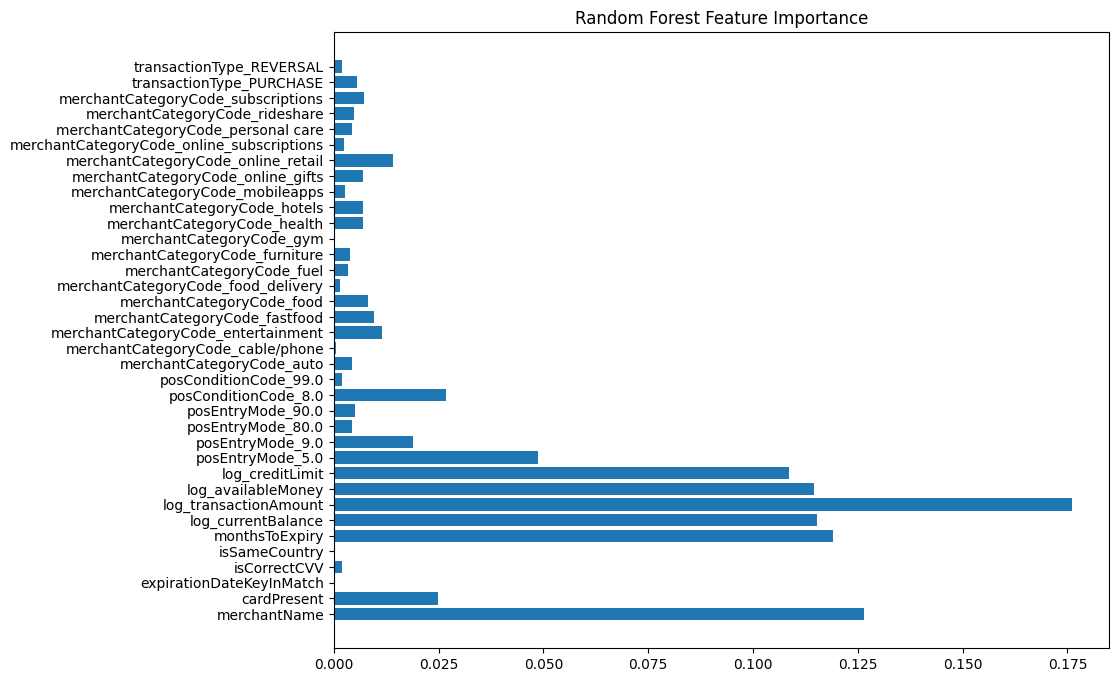

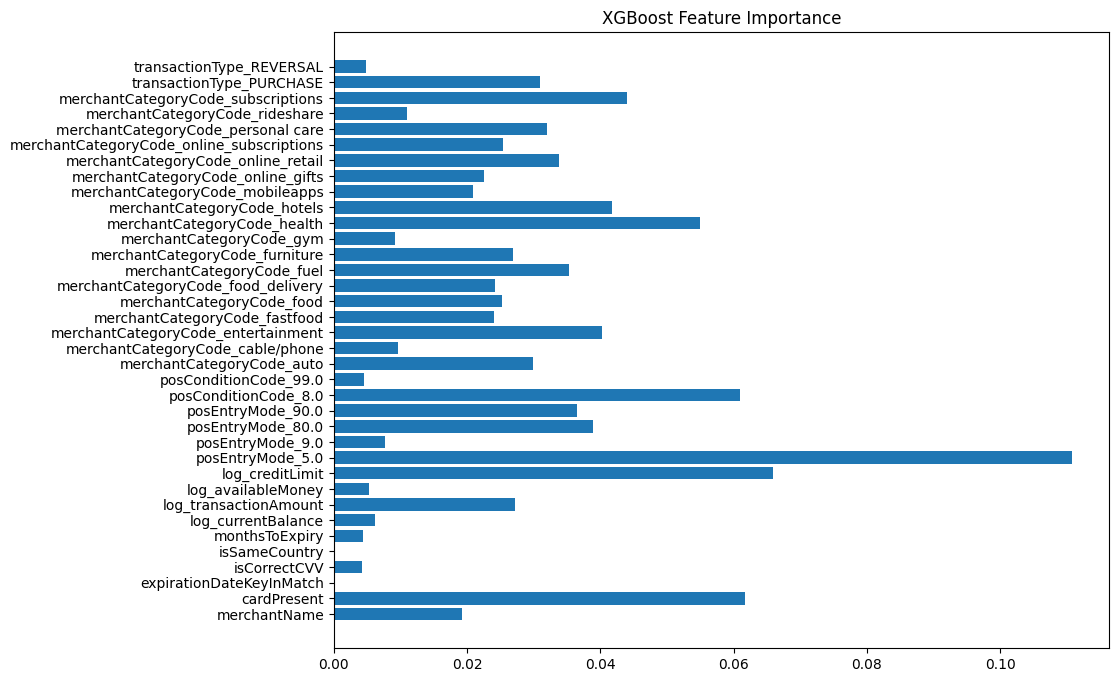

In [362]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt

#RF with sampled data
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_resampled, y_train_resampled)

#feature importance for RF
feature_importances_rf = model_rf.feature_importances_
print("Random Forest Feature Importances:")
for feature, importance in zip(X_train_resampled.columns, feature_importances_rf):
    print(f"{feature}: {importance:.4f}")

# XGboost with sampled data
model_xgb = xgb.XGBClassifier(random_state=42, enable_categorical=True, device='cuda', tree_method='hist')
model_xgb.fit(X_train_resampled, y_train_resampled)

#feature importance for XBboost
feature_importances_xgb = model_xgb.feature_importances_
print("\nXGBoost Feature Importances:")
for feature, importance in zip(X_train_resampled.columns, feature_importances_xgb):
    print(f"{feature}: {importance:.4f}")

#plot feature importance for RF
plt.figure(figsize=(10, 8))
plt.barh(X_train_resampled.columns, feature_importances_rf)
plt.title('Random Forest Feature Importance')
plt.show()

#plot feature importance for XGboost
plt.figure(figsize=(10, 8))
plt.barh(X_train_resampled.columns, feature_importances_xgb)
plt.title('XGBoost Feature Importance')
plt.show()


In [363]:
#we need to put isFraud coulmn back in to correlate against
X_train_resampled['isFraud'] = y_train_resampled

#calculate the correlation matrix for SMOTENC sampled data
corr_matrix_smote_nc = X_train_resampled.corr()['isFraud'].sort_values(ascending=False)

print("\nCorrelation of features with isFraud (SMOTENC dataset):")
print(corr_matrix_smote_nc)



Correlation of features with isFraud (SMOTENC dataset):
isFraud                                      1.000000
log_transactionAmount                        0.272215
posEntryMode_9.0                             0.171535
merchantCategoryCode_online_retail           0.168972
transactionType_PURCHASE                     0.095880
merchantName                                 0.085609
merchantCategoryCode_online_gifts            0.052872
log_currentBalance                           0.044824
merchantCategoryCode_rideshare               0.042061
isCorrectCVV                                 0.029534
log_creditLimit                              0.013069
isSameCountry                                0.006508
monthsToExpiry                               0.003675
log_availableMoney                          -0.001892
expirationDateKeyInMatch                    -0.012654
merchantCategoryCode_cable/phone            -0.024144
posConditionCode_99.0                       -0.027359
merchantCategoryCode_gym 

In [364]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

#scale the SMOTENC sampled data
scaler = MinMaxScaler()

#ensure to drop the isFraud column from the features before scaling
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled.drop(columns=['isFraud']))

#get the feature names
feature_names_resampled = X_train_resampled.drop(columns=['isFraud']).columns

# apply the Chi-squared test
chi2_resampled, p_values_resampled = chi2(X_train_resampled_scaled, y_train_resampled)

print("\nChi-squared test for SMOTENC dataset:")
for i, p_val in enumerate(p_values_resampled):
    print(f"Feature '{feature_names_resampled[i]}': Chi2 value = {chi2_resampled[i]}, p-value = {p_val}")
    
#Drop the isFraud column
X_train_resampled = X_train_resampled.drop(columns=['isFraud'])


Chi-squared test for SMOTENC dataset:
Feature 'merchantName': Chi2 value = 154.87221534490214, p-value = 1.493202539017499e-35
Feature 'cardPresent': Chi2 value = 2179.856606944426, p-value = 0.0
Feature 'expirationDateKeyInMatch': Chi2 value = 15.113878724681138, p-value = 0.00010121642356244262
Feature 'isCorrectCVV': Chi2 value = 0.598382894991756, p-value = 0.43919569090015365
Feature 'isSameCountry': Chi2 value = 0.0003388053937574752, p-value = 0.9853144337673385
Feature 'monthsToExpiry': Chi2 value = 0.18821291274430113, p-value = 0.664408175287827
Feature 'log_currentBalance': Chi2 value = 10.582797553167119, p-value = 0.0011414479939393515
Feature 'log_transactionAmount': Chi2 value = 377.38083145098767, p-value = 4.6259455758198105e-84
Feature 'log_availableMoney': Chi2 value = 0.008322202206648362, p-value = 0.9273129327610307
Feature 'log_creditLimit': Chi2 value = 1.2771361417243736, p-value = 0.2584322011059627
Feature 'posEntryMode_5.0': Chi2 value = 3817.112250163248, 

In [365]:
#based on the above scores we can see these groups arent adding much value and will increase noise in our model
features_to_drop = ['isSameCountry', 'monthsToExpiry', 'expirationDateKeyInMatch', 
                'isCorrectCVV', 'log_availableMoney', 'merchantCategoryCode_cable/phone']

X_train_cleaned = X_train_resampled.drop(columns=features_to_drop)
X_test_cleaned = X_test.drop(columns=features_to_drop)

#ensuring that we have the same shape for the train and test so that we can build our models
print("Shape of X_train before dropping:", X_train_resampled.shape)
print("Shape of X_train after dropping:", X_train_cleaned.shape)
print("Shape of X_test before dropping:", X_test.shape)
print("Shape of X_test after dropping:", X_test_cleaned.shape)

#making sure our merchanname column is encoded
X_train_resampled['merchantName'] = label_encoder.fit_transform(X_train_resampled['merchantName'])
X_test_cleaned['merchantName'] = label_encoder.fit_transform(X_test_cleaned['merchantName'])

Shape of X_train before dropping: (94456, 36)
Shape of X_train after dropping: (94456, 30)
Shape of X_test before dropping: (30000, 36)
Shape of X_test after dropping: (30000, 30)


In [366]:
"""import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

X_train_cleaned = X_train_cleaned.astype({col: 'int64' for col in X_train_cleaned.select_dtypes(include=['bool']).columns})

X_train_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

if X_train_cleaned.isnull().values.any():
    print("Missing values detected. Filling with median...")
    X_train_cleaned.fillna(X_train_cleaned.median(), inplace=True)

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif_data = calculate_vif(X_train_cleaned)
print(vif_data)
"""

'import pandas as pd\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\nimport numpy as np\n\nX_train_cleaned = X_train_cleaned.astype({col: \'int64\' for col in X_train_cleaned.select_dtypes(include=[\'bool\']).columns})\n\nX_train_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)\n\nif X_train_cleaned.isnull().values.any():\n    print("Missing values detected. Filling with median...")\n    X_train_cleaned.fillna(X_train_cleaned.median(), inplace=True)\n\ndef calculate_vif(X):\n    vif_data = pd.DataFrame()\n    vif_data["feature"] = X.columns\n    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\n    return vif_data\n\nvif_data = calculate_vif(X_train_cleaned)\nprint(vif_data)\n'

In [367]:
"""#drop features based on the combination of VIF and chi-squared/correlation analysis
features_to_drop_vif = ['creditLimit', 'availableMoney', 'currentBalance', 'merchantCategoryCode_online_retail']

X_train_cleaned_vif = X_train_cleaned.drop(columns=features_to_drop_vif)
X_test_cleaned_vif = X_test_cleaned.drop(columns=features_to_drop_vif)

print("Shape of X_train before dropping:", X_train_resampled.shape)
print("Shape of X_train_VIF after dropping:", X_train_cleaned_vif.shape)
print("Shape of X_test before dropping:", X_test.shape)
print("Shape of X_test_VIF after dropping:", X_test_cleaned_vif.shape)"""

'#drop features based on the combination of VIF and chi-squared/correlation analysis\nfeatures_to_drop_vif = [\'creditLimit\', \'availableMoney\', \'currentBalance\', \'merchantCategoryCode_online_retail\']\n\nX_train_cleaned_vif = X_train_cleaned.drop(columns=features_to_drop_vif)\nX_test_cleaned_vif = X_test_cleaned.drop(columns=features_to_drop_vif)\n\nprint("Shape of X_train before dropping:", X_train_resampled.shape)\nprint("Shape of X_train_VIF after dropping:", X_train_cleaned_vif.shape)\nprint("Shape of X_test before dropping:", X_test.shape)\nprint("Shape of X_test_VIF after dropping:", X_test_cleaned_vif.shape)'

In [368]:
"""from sklearn.feature_selection import RFE
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(random_state=42, verbose=0, task_type="GPU")

rfe = RFE(estimator=catboost_model, n_features_to_select=10)  # Choose 10 most important features
rfe.fit(X_train_cleaned, y_train_resampled)

selected_features = X_train_cleaned.columns[rfe.support_]
X_train_rfe = X_train_cleaned[selected_features]
X_test_rfe = X_test_cleaned[selected_features]  # Use X_test_cleaned instead of X_train_cleaned for test set

print(f"Selected features after RFE: {selected_features}")"""


'from sklearn.feature_selection import RFE\nfrom catboost import CatBoostClassifier\n\ncatboost_model = CatBoostClassifier(random_state=42, verbose=0, task_type="GPU")\n\nrfe = RFE(estimator=catboost_model, n_features_to_select=10)  # Choose 10 most important features\nrfe.fit(X_train_cleaned, y_train_resampled)\n\nselected_features = X_train_cleaned.columns[rfe.support_]\nX_train_rfe = X_train_cleaned[selected_features]\nX_test_rfe = X_test_cleaned[selected_features]  # Use X_test_cleaned instead of X_train_cleaned for test set\n\nprint(f"Selected features after RFE: {selected_features}")'

In [369]:
"""# Ensure test sets are consistent
print(f"Shape of X_test_rfe: {X_test_rfe.shape}")
print(f"Shape of y_test: {y_test.shape}")"""

'# Ensure test sets are consistent\nprint(f"Shape of X_test_rfe: {X_test_rfe.shape}")\nprint(f"Shape of y_test: {y_test.shape}")'

In [370]:
#incase you don't have these downloaded, Kaggle already had it!
#!pip install scikit-learn xgboost lightgbm catboost

In [371]:
#cross verify no object type variables
X_test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 75721 to 34122
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   merchantName                               30000 non-null  int64  
 1   cardPresent                                30000 non-null  int64  
 2   log_currentBalance                         30000 non-null  float64
 3   log_transactionAmount                      30000 non-null  float64
 4   log_creditLimit                            30000 non-null  float64
 5   posEntryMode_5.0                           30000 non-null  bool   
 6   posEntryMode_9.0                           30000 non-null  bool   
 7   posEntryMode_80.0                          30000 non-null  bool   
 8   posEntryMode_90.0                          30000 non-null  bool   
 9   posConditionCode_8.0                       30000 non-null  bool   
 10  posConditionCode_99.0  

# **Basic model building**

Basic Random Forest, XGBoost, LightGBM and CatBoost

Training Random Forest...
Random Forest Metrics(Regular):
Accuracy: 0.7467
F1 Score: 0.2849
Precision: 0.1977
Recall: 0.5096
ROC AUC: 0.7239


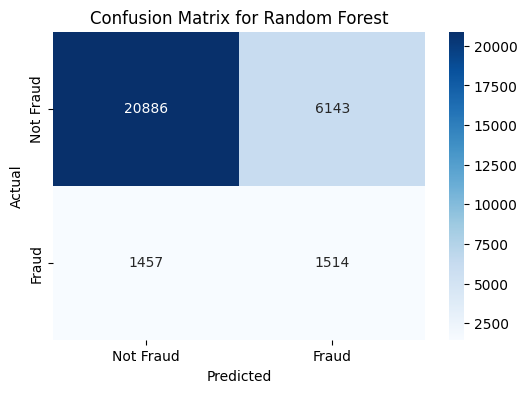


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.93      0.77      0.85     27029
           1       0.20      0.51      0.28      2971

    accuracy                           0.75     30000
   macro avg       0.57      0.64      0.57     30000
weighted avg       0.86      0.75      0.79     30000


Training XGBoost...
XGBoost Metrics(Regular):
Accuracy: 0.7041
F1 Score: 0.2835
Precision: 0.1864
Recall: 0.5910
ROC AUC: 0.7338


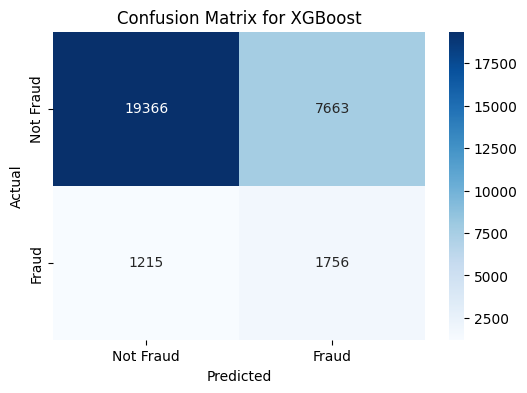


Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.94      0.72      0.81     27029
           1       0.19      0.59      0.28      2971

    accuracy                           0.70     30000
   macro avg       0.56      0.65      0.55     30000
weighted avg       0.87      0.70      0.76     30000


Training LightGBM...
LightGBM Metrics(Regular):
Accuracy: 0.8091
F1 Score: 0.3352
Precision: 0.2558
Recall: 0.4860
ROC AUC: 0.7587


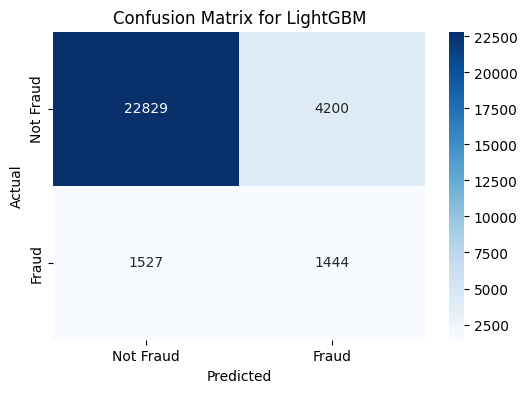


Classification Report for LightGBM:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89     27029
           1       0.26      0.49      0.34      2971

    accuracy                           0.81     30000
   macro avg       0.60      0.67      0.61     30000
weighted avg       0.87      0.81      0.83     30000


Training CatBoost...
CatBoost Metrics(Regular):
Accuracy: 0.6978
F1 Score: 0.2743
Precision: 0.1799
Recall: 0.5766
ROC AUC: 0.7241


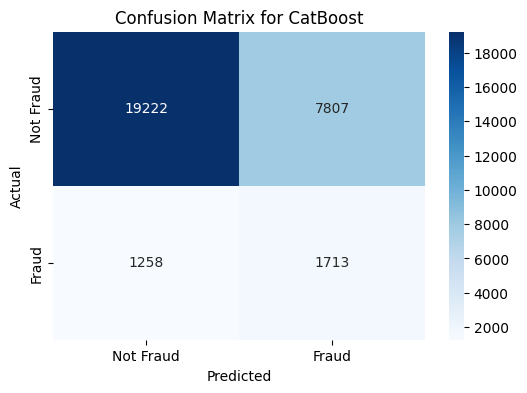


Classification Report for CatBoost:
               precision    recall  f1-score   support

           0       0.94      0.71      0.81     27029
           1       0.18      0.58      0.27      2971

    accuracy                           0.70     30000
   macro avg       0.56      0.64      0.54     30000
weighted avg       0.86      0.70      0.76     30000



In [372]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#initialize models and organiz it better in a dictionary
#ALSO PLEASE MAKE SURE TO USE A GPU WHILE RUNNING!!!
#if no gpu please comment this part of the code and run the other
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', device='cuda', tree_method='hist'),
    "LightGBM": LGBMClassifier(random_state=42, device='gpu',verbose=-1),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0, task_type="GPU")
}

"""
#No GPU
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42,verbose=-1),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0)
}
"""
print("Basic Random Forest, XGBoost, LightGBM and CatBoost")
#train and evaluate each of the 4 models
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    model.fit(X_train_cleaned, y_train_resampled)
    y_pred = model.predict(X_test_cleaned)
    y_pred_proba = model.predict_proba(X_test_cleaned)[:, 1]  # For ROC AUC

    #calculate eval metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"{model_name} Metrics(Regular):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    #build confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    #report for precision, recall, f1-score
    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred))

In [374]:
"""from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', device='cuda', tree_method='hist'),
    "LightGBM": LGBMClassifier(random_state=42, device='gpu',verbose=-1),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0, task_type="GPU")
}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    model.fit(X_train_cleaned_vif, y_train_resampled)
    
    y_pred = model.predict(X_test_cleaned_vif)
    y_pred_proba = model.predict_proba(X_test_cleaned_vif)[:, 1]  # For ROC AUC

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"{model_name} Metrics(VIF):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred))"""

'from sklearn.ensemble import RandomForestClassifier\nfrom xgboost import XGBClassifier\nfrom lightgbm import LGBMClassifier\nfrom catboost import CatBoostClassifier\nfrom sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix\nfrom sklearn.metrics import classification_report\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\nmodels = {\n    "Random Forest": RandomForestClassifier(random_state=42),\n    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric=\'logloss\', device=\'cuda\', tree_method=\'hist\'),\n    "LightGBM": LGBMClassifier(random_state=42, device=\'gpu\',verbose=-1),\n    "CatBoost": CatBoostClassifier(random_state=42, verbose=0, task_type="GPU")\n}\n\nfor model_name, model in models.items():\n    print(f"\nTraining {model_name}...")\n    \n    model.fit(X_train_cleaned_vif, y_train_resampled)\n    \n    y_pred = model.predict(X_test_cleaned_vif)\n    y_pred_proba = model.predict

In [375]:
"""from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', device='cuda', tree_method='hist'),
    "LightGBM": LGBMClassifier(random_state=42, device='gpu',verbose=-1),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0, task_type="GPU")
}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    model.fit(X_train_rfe, y_train_resampled)
    
    y_pred = model.predict(X_test_rfe)
    y_pred_proba = model.predict_proba(X_test_rfe)[:, 1]  # For ROC AUC

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"{model_name} Metrics(RFE):")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred))"""

'from sklearn.ensemble import RandomForestClassifier\nfrom xgboost import XGBClassifier\nfrom lightgbm import LGBMClassifier\nfrom catboost import CatBoostClassifier\nfrom sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix\nfrom sklearn.metrics import classification_report\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\nmodels = {\n    "Random Forest": RandomForestClassifier(random_state=42),\n    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric=\'logloss\', device=\'cuda\', tree_method=\'hist\'),\n    "LightGBM": LGBMClassifier(random_state=42, device=\'gpu\',verbose=-1),\n    "CatBoost": CatBoostClassifier(random_state=42, verbose=0, task_type="GPU")\n}\n\nfor model_name, model in models.items():\n    print(f"\nTraining {model_name}...")\n    \n    model.fit(X_train_rfe, y_train_resampled)\n    \n    y_pred = model.predict(X_test_rfe)\n    y_pred_proba = model.predict_proba(X_test_rf

# **Cross Validation for ROC and F1 Score**

In [376]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

#initialize Stratified Cross-Validation with 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#initialize models as earlier
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', device='cuda', tree_method='hist'),
    "LightGBM": LGBMClassifier(random_state=42, device='gpu',verbose=-1),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0, task_type="GPU")
}

#function to perform cross-validation and print results
def evaluate_model_with_cv(model, model_name, X_train, y_train):
    print(f"\nEvaluating {model_name} with Cross-Validation...")
    
    #perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    print(f"{model_name} Cross-Validated ROC AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

#evaluate each model using cv
for model_name, model in models.items():
    evaluate_model_with_cv(model, model_name, X_train_cleaned, y_train_resampled)



Evaluating Random Forest with Cross-Validation...
Random Forest Cross-Validated ROC AUC: 0.9145 ± 0.0022

Evaluating XGBoost with Cross-Validation...
XGBoost Cross-Validated ROC AUC: 0.9245 ± 0.0024

Evaluating LightGBM with Cross-Validation...
LightGBM Cross-Validated ROC AUC: 0.9267 ± 0.0026

Evaluating CatBoost with Cross-Validation...
CatBoost Cross-Validated ROC AUC: 0.9252 ± 0.0030


In [377]:
#initialize Stratified Cross-Validation with 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#initialize models as earlier
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', device='cuda', tree_method='hist'),
    "LightGBM": LGBMClassifier(random_state=42, device='gpu',verbose=-1),
    "CatBoost": CatBoostClassifier(random_state=42, verbose=0, task_type="GPU")
}

#function to perform cross-validation and print results
def evaluate_model_with_cv(model, model_name, X_train, y_train):
    print(f"\nEvaluating {model_name} with Cross-Validation...")
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    
    print(f"{model_name} Cross-Validated F1: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

#evaluate each model using cv
for model_name, model in models.items():
    evaluate_model_with_cv(model, model_name, X_train_cleaned, y_train_resampled)



Evaluating Random Forest with Cross-Validation...
Random Forest Cross-Validated F1: 0.7733 ± 0.0039

Evaluating XGBoost with Cross-Validation...
XGBoost Cross-Validated F1: 0.7885 ± 0.0042

Evaluating LightGBM with Cross-Validation...
LightGBM Cross-Validated F1: 0.7886 ± 0.0049

Evaluating CatBoost with Cross-Validation...
CatBoost Cross-Validated F1: 0.7839 ± 0.0039


# **XGBoost Model with hyperparameter tuning, cross validation and threshold tuning**

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [05:46:49] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [05:46:51] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for boo

Best parameters for XGBoost: {'tree_method': 'hist', 'subsample': 1.0, 'scale_pos_weight': 2, 'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.05, 'gamma': 0.5, 'eval_metric': 'logloss', 'colsample_bytree': 1.0}
Best F1 score during cross-validation: 0.7702064822701934

Final Model Evaluation Metrics for XGBoost:
Accuracy: 0.7124
F1 Score: 0.3060
Precision: 0.2010
Recall: 0.6402
ROC AUC: 0.7525


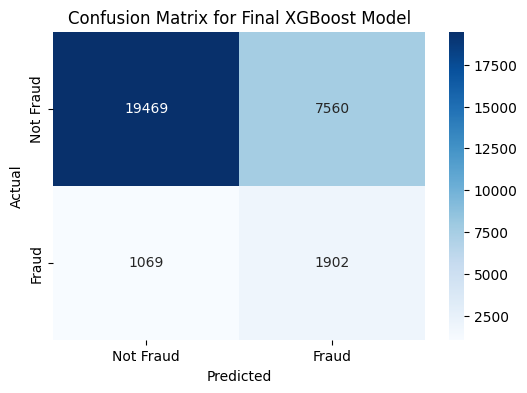


Classification Report for Final XGBoost Model:
               precision    recall  f1-score   support

           0       0.95      0.72      0.82     27029
           1       0.20      0.64      0.31      2971

    accuracy                           0.71     30000
   macro avg       0.57      0.68      0.56     30000
weighted avg       0.87      0.71      0.77     30000



In [378]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#hyperparameter grid for XGBoost
xgboost_param_grid_extended = {
    'n_estimators': [200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [4, 6, 9, 12],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5, 1],
    'scale_pos_weight': [1, 1.5, 2],
    'reg_lambda': [1, 5, 10],
    'reg_alpha': [0, 0.1, 1],
    'tree_method': ['hist'],
    'eval_metric': ['logloss']
}

#initialize classifier
xgboost_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', device='cuda', tree_method='hist')

#perform RandomizedSearchCV to find best hyperparameters
random_search = RandomizedSearchCV(
    estimator=xgboost_model,
    param_distributions=xgboost_param_grid_extended,
    n_iter=20,
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=-1
)

#fit the model with cross-validation - helps choose best parameters
random_search.fit(X_train_cleaned, y_train_resampled)

best_xgboost_params = random_search.best_params_
print(f"Best parameters for XGBoost: {best_xgboost_params}")
print(f"Best F1 score during cross-validation: {random_search.best_score_}")

#remove 'tree_method' and 'eval_metric' (since we were getting a few errors) from best parameters to avoid conflict
best_xgboost_params.pop('tree_method', None)
best_xgboost_params.pop('eval_metric', None)

#train the final model with the best parameters
final_xgboost_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    **best_xgboost_params
)

#fit the final model on the full training data
final_xgboost_model.fit(X_train_cleaned, y_train_resampled)

y_pred = final_xgboost_model.predict(X_test_cleaned)
y_pred_proba = final_xgboost_model.predict_proba(X_test_cleaned)[:, 1]  # For ROC AUC

#calculate eval metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nFinal Model Evaluation Metrics for XGBoost:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

#build confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix for Final XGBoost Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#classification report for detailed precision, recall, f1-score
print(f"\nClassification Report for Final XGBoost Model:\n", classification_report(y_test, y_pred))

In [379]:
from sklearn.metrics import precision_recall_curve
import numpy as np

#get predicted probabilities
y_pred_proba = final_xgboost_model.predict_proba(X_test_cleaned)[:, 1]

#generate precision-recall curve to find the best threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

#calculate F1 score for each threshold
f1_scores = []
for p, r in zip(precision, recall):
    if p + r == 0:  # Avoid division by zero
        f1_scores.append(0)
    else:
        f1_scores.append(2 * (p * r) / (p + r))

f1_scores = np.array(f1_scores)

#find the index of the best F1 score
best_threshold_index = f1_scores.argmax()
best_threshold = thresholds[best_threshold_index]

print(f'Best Threshold: {best_threshold}')
print(f'Best F1 Score at this threshold: {f1_scores[best_threshold_index]}')

#apply the best threshold to your predicted probabilities
y_pred_thresholded = (y_pred_proba >= best_threshold).astype(int)

#evaluate performance with the new threshold
accuracy = accuracy_score(y_test, y_pred_thresholded)
f1 = f1_score(y_test, y_pred_thresholded)
precision = precision_score(y_test, y_pred_thresholded)
recall = recall_score(y_test, y_pred_thresholded)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nFinal Model Evaluation with Threshold {best_threshold}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

#classification report for detailed precision, recall, f1-score
print(f"\nClassification Report:\n", classification_report(y_test, y_pred_thresholded))


Best Threshold: 0.6639042496681213
Best F1 Score at this threshold: 0.31988322385569806

Final Model Evaluation with Threshold 0.6639042496681213:
Accuracy: 0.7826
F1 Score: 0.3199
Precision: 0.2317
Recall: 0.5163
ROC AUC: 0.7525

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87     27029
           1       0.23      0.52      0.32      2971

    accuracy                           0.78     30000
   macro avg       0.59      0.66      0.60     30000
weighted avg       0.87      0.78      0.82     30000



# **LightGBM Model with hyperparameter tuning, cross validation and threshold tuning**

Best parameters for LightGBM: {'subsample': 1.0, 'num_leaves': 127, 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best score for LightGBM: 0.7770
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[51]	valid_0's binary_logloss: 0.334662

Final Model Evaluation Metrics LightGBM (Hyper Parameter tuning):
Accuracy: 0.8571
F1 Score: 0.3474
Precision: 0.3171
Recall: 0.3840
ROC AUC: 0.7688


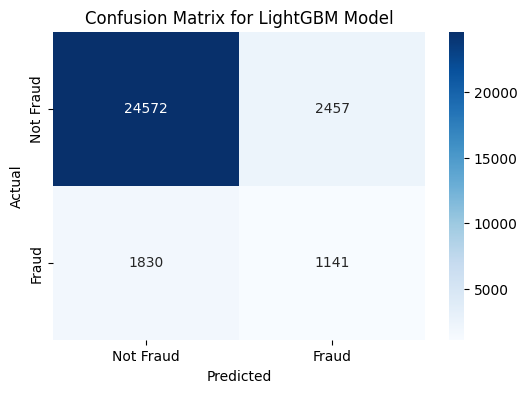


Classification Report for Based Final Light GBM model Model:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     27029
           1       0.32      0.38      0.35      2971

    accuracy                           0.86     30000
   macro avg       0.62      0.65      0.63     30000
weighted avg       0.87      0.86      0.86     30000



In [380]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

#hyperparameter grid for lightgbm
lgbm_param_grid_revised = {
    'n_estimators': [500],  # Fixing a reasonable value
    'learning_rate': [0.01, 0.05],  # Keep it moderate
    'max_depth': [4, 6],  # Not too deep to avoid overfitting
    'num_leaves': [15, 31],  # Limiting complexity
    'subsample': [0.8],  # Fixed subsample for consistency
    'colsample_bytree': [0.8],  # Avoid using full features
    'min_child_weight': [5],  # Conservative choice for regularization
    'reg_lambda': [0.01, 0.1],  # Reducing regularization strength
    'reg_alpha': [0.01],  # Same for L1 regularization
    'scale_pos_weight': [1.5]  # Adjusting for class imbalance
}


#perform RandomizedSearchCV to find best hyperparameters
lgbm_random_search = RandomizedSearchCV(
    estimator=LGBMClassifier(random_state=42, device='gpu',verbose=-1),
    param_distributions=lgbm_param_grid,
    n_iter=10,  # Number of parameter settings to sample
    scoring='f1',  # Could also use 'f1', 'accuracy', etc.
    cv=3,
    verbose=-1,
    random_state=42,
    n_jobs=-1
)

#fit the model with cross-validation - helps choose best parameters
lgbm_random_search.fit(X_train_cleaned, y_train_resampled)

#save the best parameters for LightGBM
best_lightgbm_params = lgbm_random_search.best_params_

print(f"Best parameters for LightGBM: {best_lightgbm_params}")
print(f"Best score for LightGBM: {lgbm_random_search.best_score_:.4f}")

#train the final model with the best parameters
final_lightgbm_model = LGBMClassifier(
    random_state=42,
    device="gpu",
    verbose=-1,
    **best_lightgbm_params
)

from lightgbm import early_stopping

#fit the final model on the full training data
final_lightgbm_model.fit(
    X_train_cleaned,
    y_train_resampled,
    eval_set=[(X_test_cleaned, y_test)],  # Validation set to monitor
    eval_metric='logloss',  # Metric to monitor during early stopping
    callbacks=[early_stopping(stopping_rounds=50)],  # Early stopping callback
)


y_pred = final_lightgbm_model.predict(X_test_cleaned)
y_pred_proba = final_lightgbm_model.predict_proba(X_test_cleaned)[:, 1]  # For ROC AUC

#calculate all the metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nFinal Model Evaluation Metrics LightGBM (Hyper Parameter tuning):")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

#confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix for LightGBM Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#classification report for detailed precision, recall, f1-score
print(f"\nClassification Report for Based Final Light GBM model Model:\n", classification_report(y_test, y_pred))

In [381]:
from sklearn.metrics import precision_recall_curve
import numpy as np

#get predicted probabilities 
y_pred_proba = final_lightgbm_model.predict_proba(X_test_cleaned)[:, 1]

#generate precision-recall curve to find the best threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

#calculate F1 score for each threshold
f1_scores = []
for p, r in zip(precision, recall):
    if p + r == 0:  # Avoid division by zero
        f1_scores.append(0)
    else:
        f1_scores.append(2 * (p * r) / (p + r))

f1_scores = np.array(f1_scores)

#find the index of the best F1 score
best_threshold_index = f1_scores.argmax()
best_threshold = thresholds[best_threshold_index]

print(f'Best Threshold: {best_threshold}')
print(f'Best F1 Score at this threshold: {f1_scores[best_threshold_index]}')

#apply the best threshold to your predicted probabilities
y_pred_thresholded = (y_pred_proba >= best_threshold).astype(int)

#evaluate performance with the new threshold
accuracy = accuracy_score(y_test, y_pred_thresholded)
f1 = f1_score(y_test, y_pred_thresholded)
precision = precision_score(y_test, y_pred_thresholded)
recall = recall_score(y_test, y_pred_thresholded)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nFinal Model Evaluation with Threshold {best_threshold}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Classification report for detailed precision, recall, f1-score
print(f"\nClassification Report:\n", classification_report(y_test, y_pred_thresholded))


Best Threshold: 0.35945700888505944
Best F1 Score at this threshold: 0.35331452750352604

Final Model Evaluation with Threshold 0.35945700888505944:
Accuracy: 0.8166
F1 Score: 0.3533
Precision: 0.2714
Recall: 0.5059
ROC AUC: 0.7688

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89     27029
           1       0.27      0.51      0.35      2971

    accuracy                           0.82     30000
   macro avg       0.61      0.68      0.62     30000
weighted avg       0.87      0.82      0.84     30000



In [382]:
"""from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

catboost_param_grid = {
    'iterations': [200, 300, 500],
    'learning_rate': [0.001, 0.01, 0.1],
    'depth': [4, 6, 9],
    'bootstrap_type': ['Bernoulli'],  # Specify Bernoulli for subsample support
    'subsample': [0.8, 1.0]  # Now subsample is supported
}

catboost_model = CatBoostClassifier(random_state=42, task_type="GPU", verbose=0)

random_search = RandomizedSearchCV(
    estimator=catboost_model, 
    param_distributions=catboost_param_grid, 
    n_iter=10, 
    scoring='f1', 
    cv=3, 
    random_state=42,
    n_jobs=1
)

random_search.fit(X_train_rfe, y_train_resampled)

catboost_best_params = random_search.best_params_
print(f"Best parameters for CatBoost: {catboost_best_params}")
print(f"Best F1 score during cross-validation: {random_search.best_score_}")

final_catboost_model = CatBoostClassifier(
    random_state=42,
    task_type="GPU",
    verbose=0,
    **catboost_best_params
)

final_catboost_model.fit(X_train_rfe, y_train_resampled)

y_pred = final_catboost_model.predict(X_test_rfe)
y_pred_proba = final_catboost_model.predict_proba(X_test_rfe)[:, 1]  # For ROC AUC

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nFinal Model Evaluation Metrics (RFE and Hyper Parameter tuning):")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix for Final CatBoost Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(f"\nClassification Report for RFE Based Final CatBoost Model:\n", classification_report(y_test, y_pred))
"""


'from catboost import CatBoostClassifier\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, classification_report\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\ncatboost_param_grid = {\n    \'iterations\': [200, 300, 500],\n    \'learning_rate\': [0.001, 0.01, 0.1],\n    \'depth\': [4, 6, 9],\n    \'bootstrap_type\': [\'Bernoulli\'],  # Specify Bernoulli for subsample support\n    \'subsample\': [0.8, 1.0]  # Now subsample is supported\n}\n\ncatboost_model = CatBoostClassifier(random_state=42, task_type="GPU", verbose=0)\n\nrandom_search = RandomizedSearchCV(\n    estimator=catboost_model, \n    param_distributions=catboost_param_grid, \n    n_iter=10, \n    scoring=\'f1\', \n    cv=3, \n    random_state=42,\n    n_jobs=1\n)\n\nrandom_search.fit(X_train_rfe, y_train_resampled)\n\ncatboost_best_params = random_search.best_params_\nprint(f"Best parameter

In [384]:
"""from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

catboost_param_grid = {
    'iterations': [200, 300, 500],
    'learning_rate': [0.001, 0.01, 0.1],
    'depth': [4, 6, 9],
    'bootstrap_type': ['Bernoulli'],  # Specify Bernoulli for subsample support
    'subsample': [0.8, 1.0]  # Now subsample is supported
}

catboost_model = CatBoostClassifier(random_state=42, task_type="GPU", verbose=0)

random_search = RandomizedSearchCV(
    estimator=catboost_model, 
    param_distributions=catboost_param_grid, 
    n_iter=10, 
    scoring='f1', 
    cv=3, 
    random_state=42,
    n_jobs=1
)

random_search.fit(X_train_cleaned_vif, y_train_resampled)

catboost_best_params = random_search.best_params_
print(f"Best parameters for CatBoost: {catboost_best_params}")
print(f"Best F1 score during cross-validation: {random_search.best_score_}")

final_catboost_model = CatBoostClassifier(
    random_state=42,
    task_type="GPU",
    verbose=0,
    **catboost_best_params
)

final_catboost_model.fit(X_train_cleaned_vif, y_train_resampled)

y_pred = final_catboost_model.predict(X_test_cleaned_vif)
y_pred_proba = final_catboost_model.predict_proba(X_test_cleaned_vif)[:, 1]  # For ROC AUC

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nFinal Model Evaluation Metrics (VIF and Hyper Parameter tuning):")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix for Final CatBoost Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print(f"\nClassification Report for VIF Based Final CatBoost Model:\n", classification_report(y_test, y_pred))
"""


'from catboost import CatBoostClassifier\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, classification_report\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\ncatboost_param_grid = {\n    \'iterations\': [200, 300, 500],\n    \'learning_rate\': [0.001, 0.01, 0.1],\n    \'depth\': [4, 6, 9],\n    \'bootstrap_type\': [\'Bernoulli\'],  # Specify Bernoulli for subsample support\n    \'subsample\': [0.8, 1.0]  # Now subsample is supported\n}\n\ncatboost_model = CatBoostClassifier(random_state=42, task_type="GPU", verbose=0)\n\nrandom_search = RandomizedSearchCV(\n    estimator=catboost_model, \n    param_distributions=catboost_param_grid, \n    n_iter=10, \n    scoring=\'f1\', \n    cv=3, \n    random_state=42,\n    n_jobs=1\n)\n\nrandom_search.fit(X_train_cleaned_vif, y_train_resampled)\n\ncatboost_best_params = random_search.best_params_\nprint(f"Best p

# **CatBoost Model with hyperparameter tuning, cross validation and threshold tuning**

Best parameters for CatBoost: {'subsample': 0.8, 'learning_rate': 0.1, 'iterations': 500, 'depth': 6, 'bootstrap_type': 'Bernoulli'}
Best F1 score during cross-validation: 0.8619191657077433

Final Model Evaluation Metrics:
Accuracy: 0.7785
F1 Score: 0.3026
Precision: 0.2199
Recall: 0.4854
ROC AUC: 0.7338


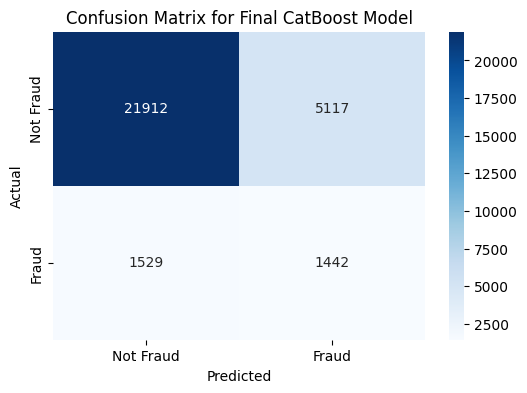


Classification Report for Final CatBoost Model:
               precision    recall  f1-score   support

           0       0.93      0.81      0.87     27029
           1       0.22      0.49      0.30      2971

    accuracy                           0.78     30000
   macro avg       0.58      0.65      0.59     30000
weighted avg       0.86      0.78      0.81     30000



In [385]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

#hyperparameter grid for catboost
catboost_param_grid_revised = {
    'iterations': [500, 1000],  # Fixing a reasonable value
    'learning_rate': [0.01, 0.05, 0.1],  # Keep it moderate
    'depth': [6, 8, 10],  # Not too deep to avoid overfitting
    'l2_leaf_reg': [1, 5, 10],  # Similar to LightGBM's reg_lambda
    'min_data_in_leaf': [5],  # Conservative choice for regularization
    'subsample': [0.8],  # Fixed subsample for consistency
    'colsample_bylevel': [0.8],  # Similar to colsample_bytree in LightGBM
    'scale_pos_weight': [1.5],  # Adjusting for class imbalance
    'random_strength': [1, 5]  # Regularization to avoid overfitting
}

catboost_model = CatBoostClassifier(random_state=42, task_type="GPU", verbose=0)

#perform RandomizedSearchCV to find best hyperparameters
random_search = RandomizedSearchCV(
    estimator=catboost_model, 
    param_distributions=catboost_param_grid, 
    n_iter=20, 
    scoring='precision', 
    cv=3, 
    random_state=42,
    n_jobs=1
)

#fit the model with cross-validation - helps choose best parameters
random_search.fit(X_train_cleaned, y_train_resampled)

best_catboost_params = random_search.best_params_
print(f"Best parameters for CatBoost: {best_catboost_params}")
print(f"Best F1 score during cross-validation: {random_search.best_score_}")


#train the final model with the best parameters
final_catboost_model = CatBoostClassifier(
    random_state=42,
    task_type="GPU",
    verbose=0,
    **best_catboost_params,
)


#fit the final model on the full training data
final_catboost_model.fit(
    X_train_cleaned, 
    y_train_resampled, 
    eval_set=[(X_test_cleaned, y_test)], 
    early_stopping_rounds=50,  # Stop if no improvement
)

y_pred = final_catboost_model.predict(X_test_cleaned)
y_pred_proba = final_catboost_model.predict_proba(X_test_cleaned)[:, 1]  # For ROC AUC

#calculate all the metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nFinal Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix for Final CatBoost Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#classification report for detailed precision, recall, f1-score
print(f"\nClassification Report for Final CatBoost Model:\n", classification_report(y_test, y_pred))


In [386]:
from sklearn.metrics import precision_recall_curve
import numpy as np

#get predicted probabilities 
y_pred_proba = final_catboost_model.predict_proba(X_test_cleaned)[:, 1]

#generate precision-recall curve to find the best threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

#calculate F1 score for each threshold
f1_scores = []
for p, r in zip(precision, recall):
    if p + r == 0:  # Avoid division by zero
        f1_scores.append(0)
    else:
        f1_scores.append(2 * (p * r) / (p + r))

f1_scores = np.array(f1_scores)

#find the index of the best F1 score
best_threshold_index = f1_scores.argmax()
best_threshold = thresholds[best_threshold_index]

print(f'Best Threshold: {best_threshold}')
print(f'Best F1 Score at this threshold: {f1_scores[best_threshold_index]}')

#apply the best threshold to your predicted probabilities
y_pred_thresholded = (y_pred_proba >= best_threshold).astype(int)

#evaluate performance with the new threshold
accuracy = accuracy_score(y_test, y_pred_thresholded)
f1 = f1_score(y_test, y_pred_thresholded)
precision = precision_score(y_test, y_pred_thresholded)
recall = recall_score(y_test, y_pred_thresholded)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nFinal Model Evaluation with Threshold {best_threshold}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Classification report for detailed precision, recall, f1-score
print(f"\nClassification Report:\n", classification_report(y_test, y_pred_thresholded))


Best Threshold: 0.559881590267627
Best F1 Score at this threshold: 0.31455761316872427

Final Model Evaluation with Threshold 0.559881590267627:
Accuracy: 0.8223
F1 Score: 0.3146
Precision: 0.2545
Recall: 0.4116
ROC AUC: 0.7338

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90     27029
           1       0.25      0.41      0.31      2971

    accuracy                           0.82     30000
   macro avg       0.59      0.64      0.61     30000
weighted avg       0.86      0.82      0.84     30000



# **Building Ensemble Model**

In [387]:
from sklearn.ensemble import VotingClassifier

#ensemble model with class weights
ensemble_model = VotingClassifier(
    estimators=[
        ('catboost', CatBoostClassifier(random_state=42, task_type="GPU",class_weights=[0.9, 1], verbose=0, **best_catboost_params)),
        ('xgboost', XGBClassifier(random_state=42, device='cuda', tree_method='hist', **best_xgboost_params)),
        ('lightgbm', LGBMClassifier(random_state=42,class_weight={0: 0.9, 1: 1}, device='gpu', **best_lightgbm_params, verbose=-1))
    ],
    voting='soft',
    weights=[0.3, 0.2, 0.1]  # Balancing between LightGBM and CatBoost

)

#train the ensemble model on the training data
ensemble_model.fit(X_train_cleaned, y_train_resampled)

y_pred = ensemble_model.predict(X_test_cleaned)
y_pred_proba = ensemble_model.predict_proba(X_test_cleaned)[:, 1]

#evaluate the ensemble model performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nEnsemble Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")



Ensemble Model Evaluation Metrics:
Accuracy: 0.6840
F1 Score: 0.2836
Precision: 0.1828
Recall: 0.6314
ROC AUC: 0.7372


In [388]:
from sklearn.metrics import precision_recall_curve, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report
import numpy as np

# Assuming 'ensemble_model' is your trained ensemble model
# Get predicted probabilities from the ensemble model
y_pred_proba = ensemble_model.predict_proba(X_test_cleaned)[:, 1]

# Generate precision-recall curve to find the best threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate F1 score for each threshold and handle cases where precision + recall == 0
f1_scores = []
for p, r in zip(precision, recall):
    if p + r == 0:  # Avoid division by zero
        f1_scores.append(0)
    else:
        f1_scores.append(2 * (p * r) / (p + r))

# Convert f1_scores to a NumPy array for easier indexing
f1_scores = np.array(f1_scores)

# Find the index of the best F1 score
best_threshold_index = f1_scores.argmax()
best_threshold = thresholds[best_threshold_index]

print(f'Best Threshold: {best_threshold}')
print(f'Best F1 Score at this threshold: {f1_scores[best_threshold_index]}')

# Apply the best threshold to your predicted probabilities
y_pred_thresholded = (y_pred_proba >= best_threshold).astype(int)

# Evaluate performance with the new threshold
accuracy = accuracy_score(y_test, y_pred_thresholded)
f1 = f1_score(y_test, y_pred_thresholded)
precision = precision_score(y_test, y_pred_thresholded)
recall = recall_score(y_test, y_pred_thresholded)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nFinal Model Evaluation with Threshold {best_threshold}:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Classification report for detailed precision, recall, f1-score
print(f"\nClassification Report:\n", classification_report(y_test, y_pred_thresholded))


Best Threshold: 0.911719699413391
Best F1 Score at this threshold: 0.29147286821705426

Final Model Evaluation with Threshold 0.911719699413391:
Accuracy: 0.8477
F1 Score: 0.2915
Precision: 0.2702
Recall: 0.3164
ROC AUC: 0.7372

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91     27029
           1       0.27      0.32      0.29      2971

    accuracy                           0.85     30000
   macro avg       0.60      0.61      0.60     30000
weighted avg       0.86      0.85      0.85     30000



**Stacking**

In [389]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('catboost', CatBoostClassifier(random_state=42, verbose=0, **best_catboost_params)),  # Removed task_type="GPU"
    ('xgboost', XGBClassifier(random_state=42, device='cuda', tree_method='hist', eval_metric='logloss', **best_xgboost_params)),
    ('lightgbm', LGBMClassifier(random_state=42, class_weight='balanced',verbose=-1, device='gpu', **best_lightgbm_params))
]

meta_learner = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=3, n_jobs=-1)

stacking_model.fit(X_train_cleaned, y_train_resampled)

y_pred = stacking_model.predict(X_test_cleaned)
y_pred_proba = stacking_model.predict_proba(X_test_cleaned)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nStacking Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


[05:58:51] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.




Stacking Model Evaluation Metrics:
Accuracy: 0.6777
F1 Score: 0.2804
Precision: 0.1800
Recall: 0.6341
ROC AUC: 0.7257


In [390]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier

base_learners = [
    ('catboost', CatBoostClassifier(random_state=42, verbose=0, **best_catboost_params)),  # Removed task_type="GPU"
    ('xgboost', XGBClassifier(random_state=42, device='cuda', tree_method='hist', eval_metric='logloss', **best_xgboost_params)),
    ('lightgbm', LGBMClassifier(random_state=42, class_weight='balanced', device='gpu', verbose=-1, **best_lightgbm_params))  # Suppressing LightGBM warnings
]

meta_learner = RandomForestClassifier(random_state=42)

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=3, n_jobs=-1)

stacking_model.fit(X_train_cleaned, y_train_resampled)

y_pred = stacking_model.predict(X_test_cleaned)
y_pred_proba = stacking_model.predict_proba(X_test_cleaned)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nStacking Model Evaluation Metrics with Random Forest as Meta-Learner:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")



Stacking Model Evaluation Metrics with Random Forest as Meta-Learner:
Accuracy: 0.6760
F1 Score: 0.2711
Precision: 0.1744
Recall: 0.6085
ROC AUC: 0.6909
